## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## 1.Read the data as an appropriate Time Series data and plot the data.

In [3]:
df1 = pd.read_csv('Sparkling.csv') # Reading the data
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
df1.shape

(187, 2)

In [6]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df1.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [8]:
df1.tail()

YearMonth  Sparkling Time_Stamp
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

In [9]:
df1['Time_Stamp'] = pd.to_datetime(df1['Time_Stamp'])

In [10]:
df = df1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [11]:
df.shape

(187, 1)

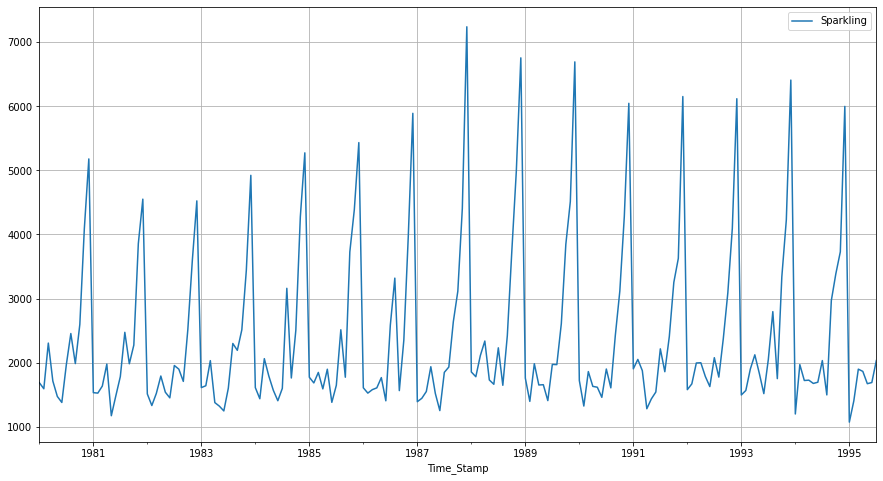

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()
plt.savefig('ts1.png')

We observe that, Sparkling wine sales show no much trend in the yearly sale.

The seasonality seems to have a pattern on yearly basis.


## 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Exploratory Data Analysis

In [13]:
df.dtypes

Sparkling    int64
dtype: object

In [14]:
df.shape #Checking shape of the dataset

(187, 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [16]:
df.describe() #Description of the data

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [17]:
df.isnull().sum() #Checking null values

Sparkling    0
dtype: int64

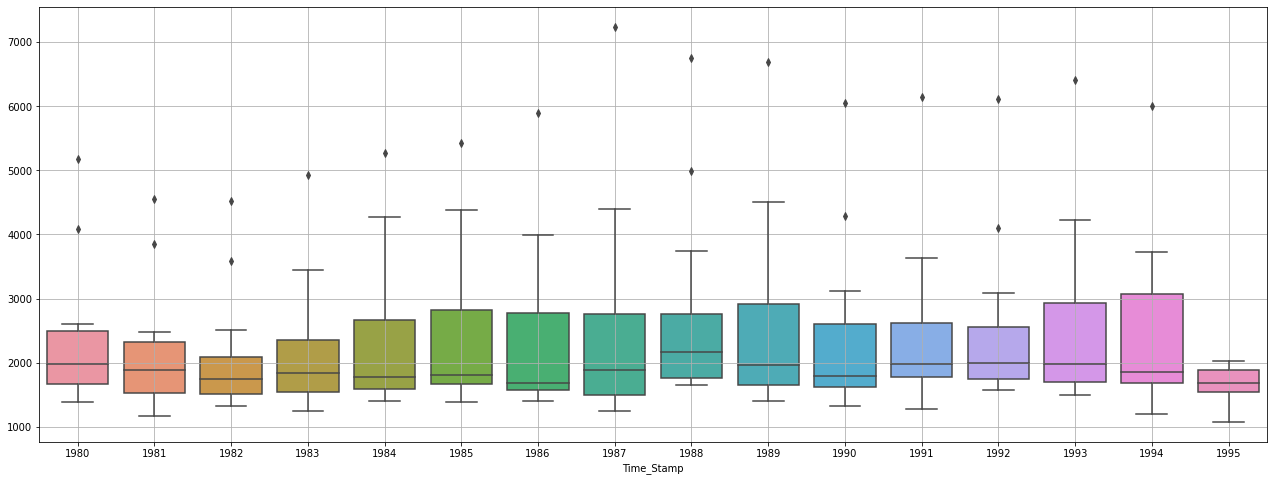

In [18]:
#Boxplot for Years
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();
plt.savefig('yearly boxplot.png')

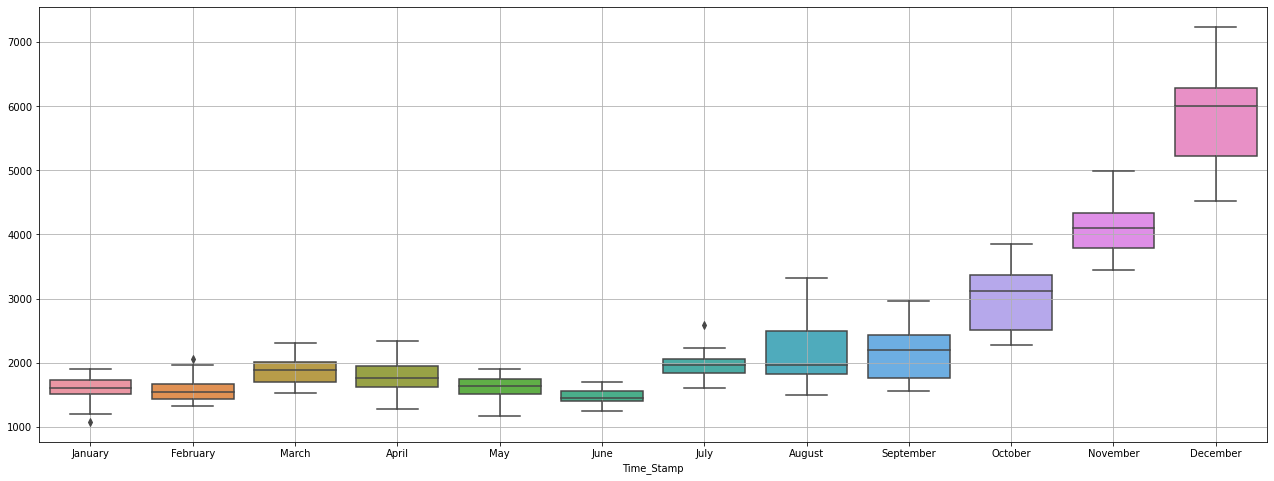

In [19]:
#Boxplot for Months
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();
plt.savefig('Monthly boxplot.png')

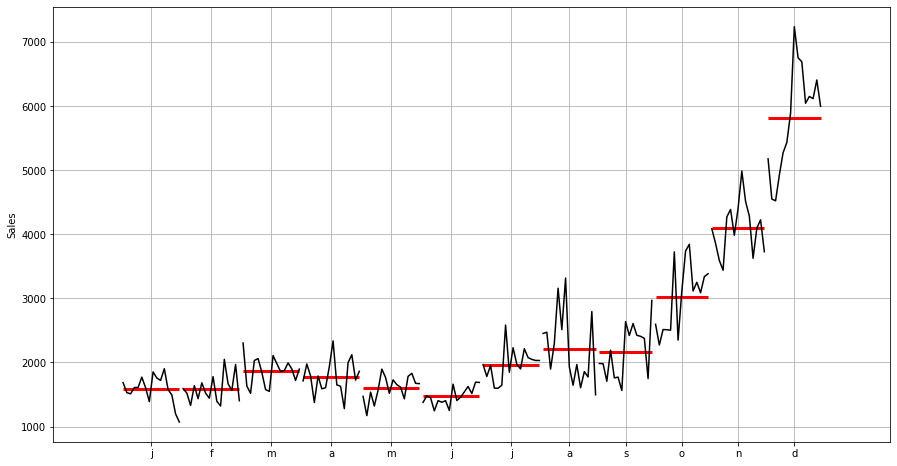

In [20]:
#Plotting a time series monthplot to understand the spread of Sales across different years and within different months across years.
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();
plt.savefig('tsm plot.png')

In [21]:
# Plot a time series monthplot to understand the spread of Sales across different years and within different months across years
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

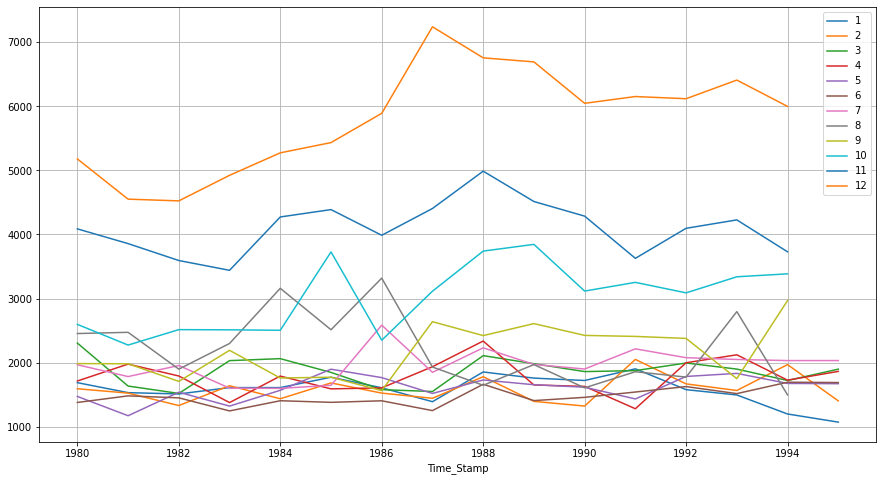

In [22]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');
plt.savefig('tsm plot2.png')

### Read this monthly data into a quarterly and yearly format. Compare the time series plot and draw inferences.


In [23]:
#yearly plot

In [24]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

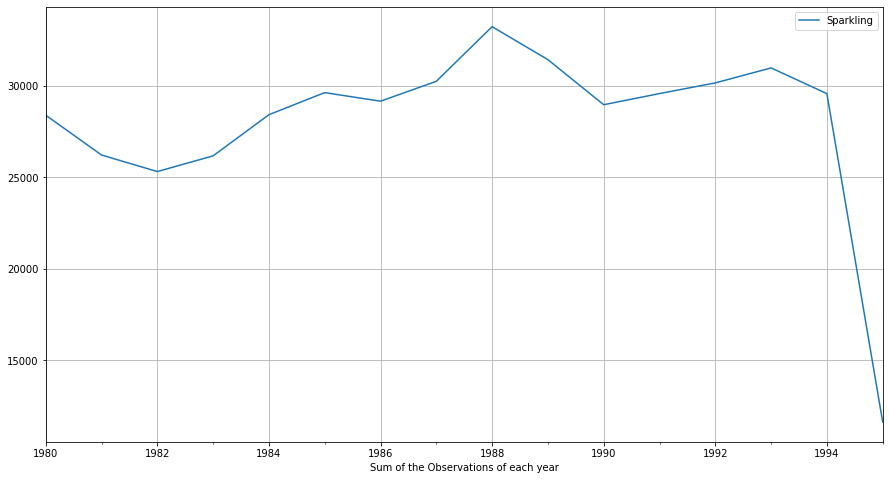

In [25]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [26]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

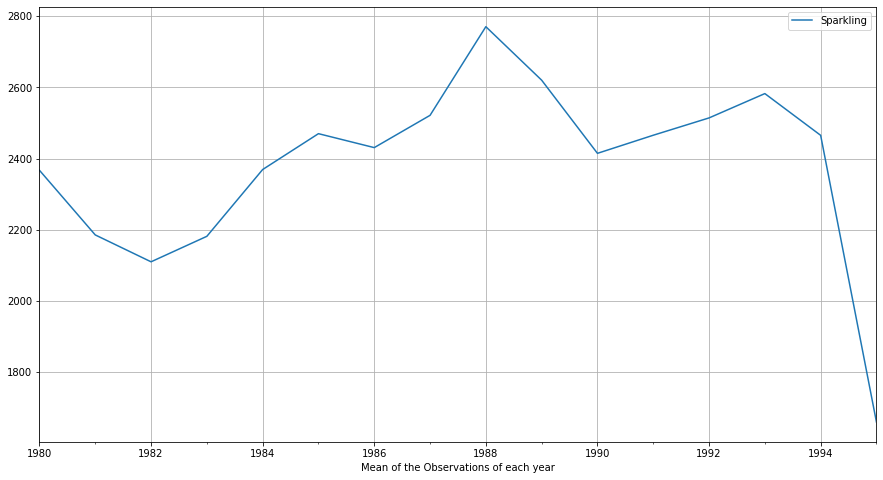

In [27]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [28]:
#Quarterly plot

In [29]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

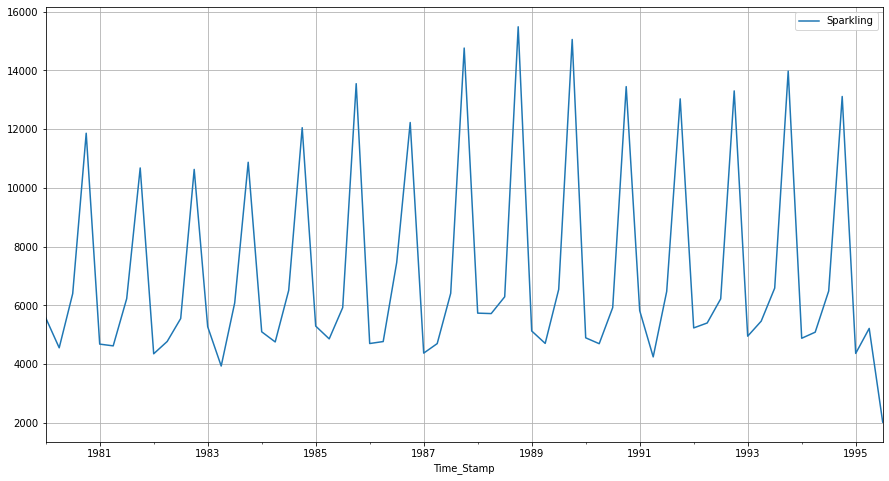

In [30]:
df_quarterly_sum.plot();
plt.grid()

In [31]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

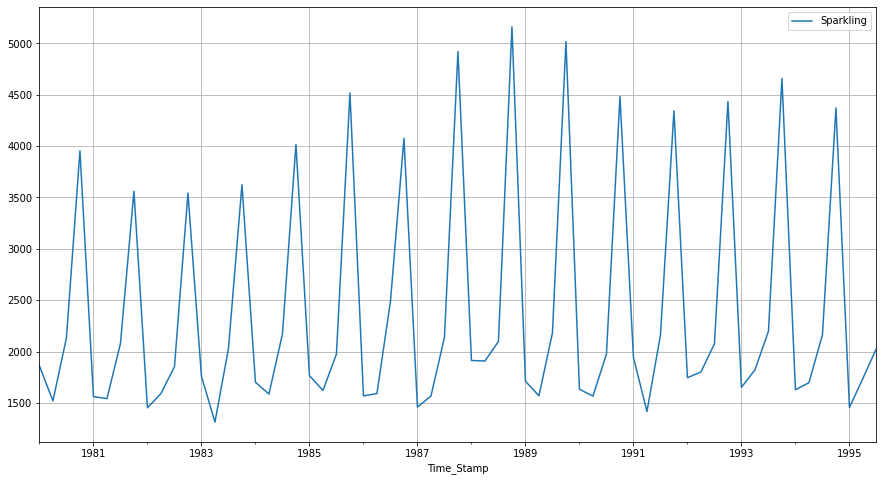

In [32]:
df_quarterly_mean.plot();
plt.grid()

In [33]:
#Daily plot

In [34]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

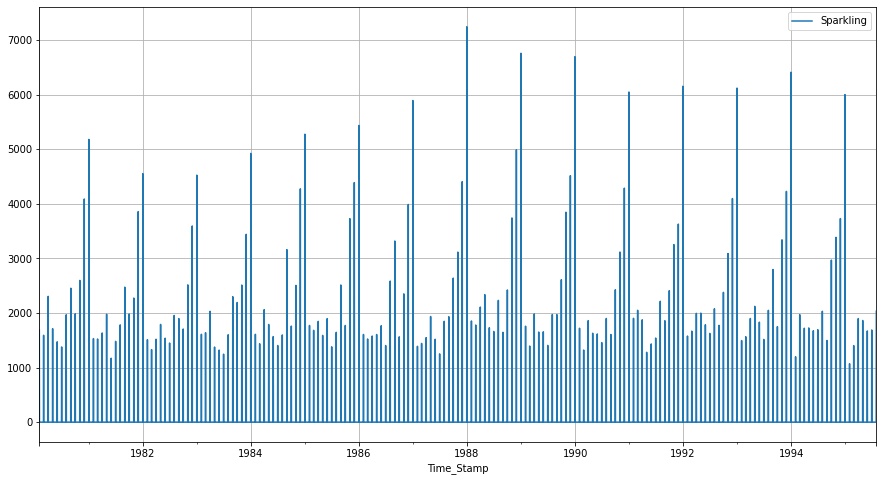

In [35]:
df_daily_sum.plot()
plt.grid();

In [36]:
#Decade plot

In [37]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

Sparkling
Time_Stamp           
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

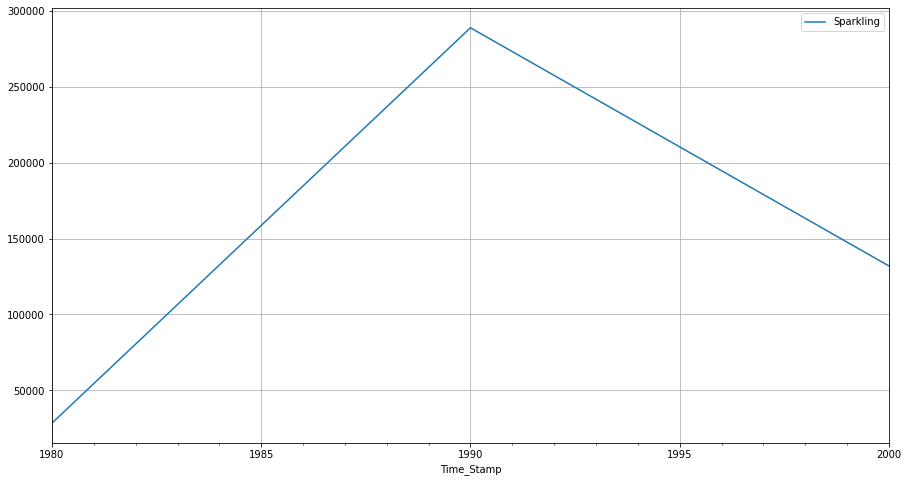

In [38]:
df_decade_sum.plot();
plt.grid()

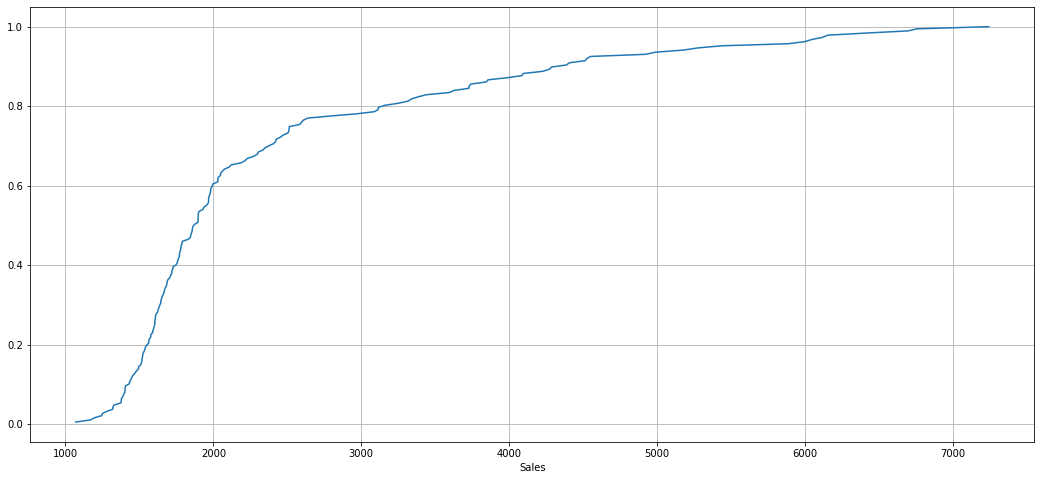

In [39]:
#Empirical Cummulative Distribution Curve

from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');
plt.savefig('ECD curve.png')

In [40]:
df['Sparkling'].min()

1070

In [41]:
df['Sparkling'].max()

7242

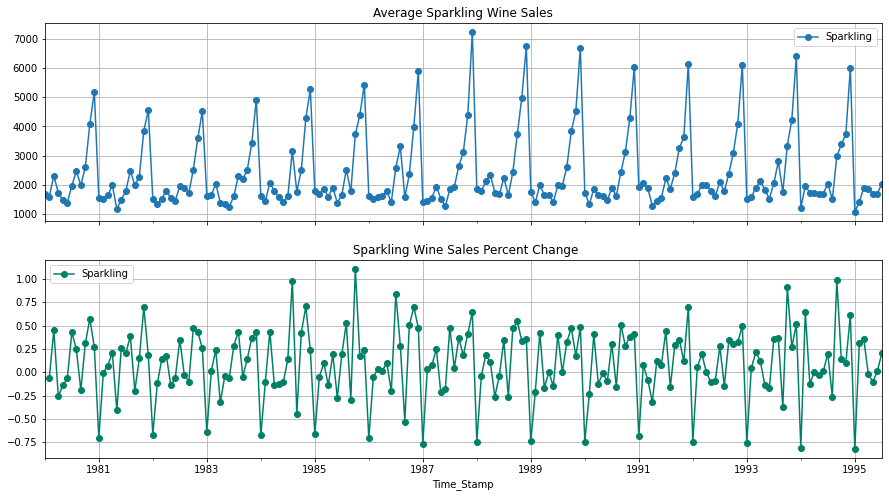

In [42]:
# Plot the average RetailSales per month and the month on month percentage change of RetailSales 
#group by date and get average Sales, and precent change

avg    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = avg.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(avg)))
ax1.set_xticklabels(avg.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title=" Sparkling Wine Sales Percent Change",grid=True)

### Decomposing The Time Series

**Additive Model**

In [43]:
from statsmodels.tsa.seasonal import   seasonal_decompose

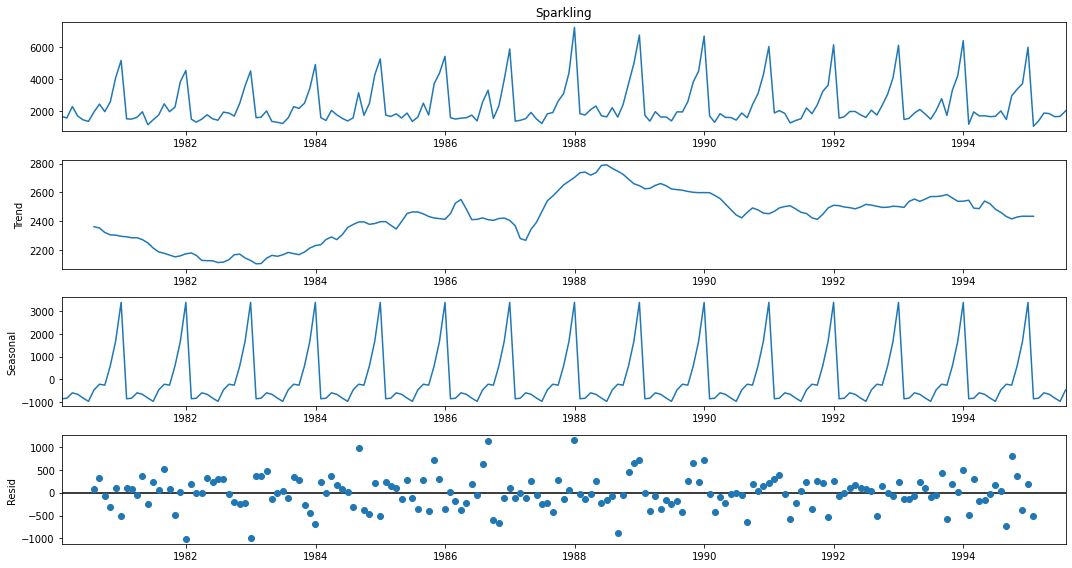

In [44]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();
plt.savefig('additive decomposition.png')

**Multiplicative Model**

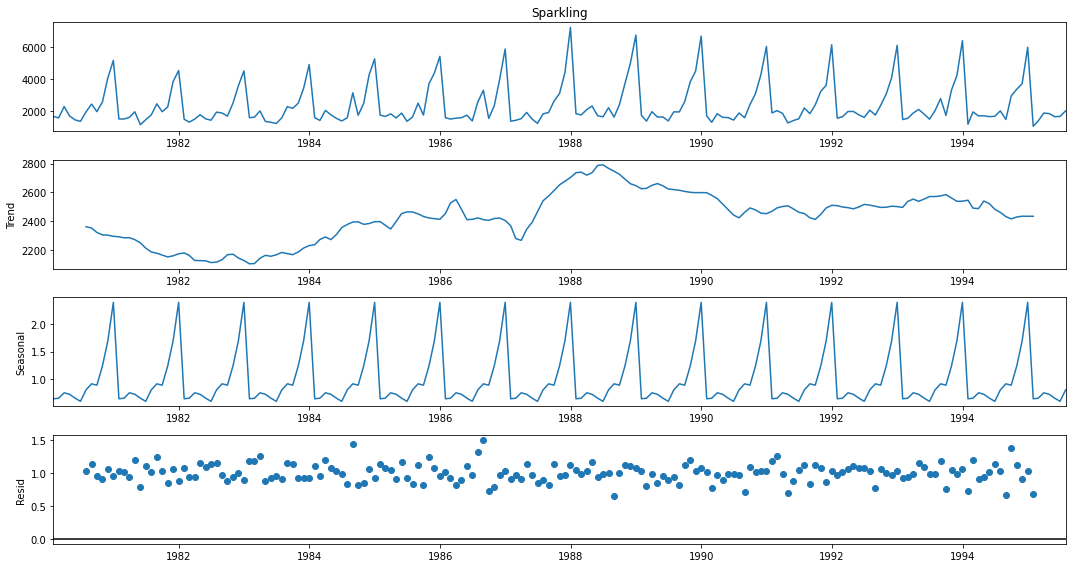

In [45]:
decomposition_m = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition_m.plot();
plt.savefig('multiplicative decomposition.png')

In [46]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

## 3.Split the data into training and test. The test data should start in 1991.

In [47]:
#Train-Test Split

train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [48]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [49]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



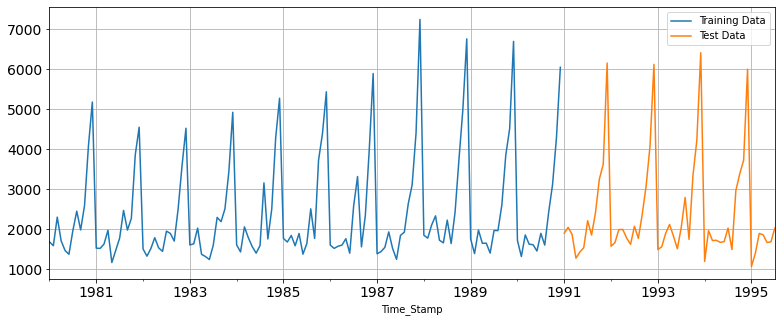

<Figure size 1080x576 with 0 Axes>

In [50]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()
plt.savefig('train-test.png')

## 4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

#### Building different models and comparing the accuracy metrics

For linear regression the equation will be y=a+b(time)

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

### Model 1: Linear Regression

In [51]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully generated the numerical time instance order for both the training and test data. Now we will add these values in the training and test data.

In [52]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [53]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [57]:
#predictions on train data
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
print([train_predictions_model1])

[array([2021.74117111, 2027.57382961, 2033.40648811, 2039.23914662,
       2045.07180512, 2050.90446362, 2056.73712213, 2062.56978063,
       2068.40243913, 2074.23509763, 2080.06775614, 2085.90041464,
       2091.73307314, 2097.56573164, 2103.39839015, 2109.23104865,
       2115.06370715, 2120.89636565, 2126.72902416, 2132.56168266,
       2138.39434116, 2144.22699966, 2150.05965817, 2155.89231667,
       2161.72497517, 2167.55763367, 2173.39029218, 2179.22295068,
       2185.05560918, 2190.88826769, 2196.72092619, 2202.55358469,
       2208.38624319, 2214.2189017 , 2220.0515602 , 2225.8842187 ,
       2231.7168772 , 2237.54953571, 2243.38219421, 2249.21485271,
       2255.04751121, 2260.88016972, 2266.71282822, 2272.54548672,
       2278.37814522, 2284.21080373, 2290.04346223, 2295.87612073,
       2301.70877923, 2307.54143774, 2313.37409624, 2319.20675474,
       2325.03941325, 2330.87207175, 2336.70473025, 2342.53738875,
       2348.37004726, 2354.20270576, 2360.03536426, 2365.8680

In [58]:
#predictions on test data
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
print([test_predictions_model1])

[array([2266.71282822, 2272.54548672, 2278.37814522, 2284.21080373,
       2290.04346223, 2295.87612073, 2301.70877923, 2307.54143774,
       2313.37409624, 2319.20675474, 2325.03941325, 2330.87207175,
       2336.70473025, 2342.53738875, 2348.37004726, 2354.20270576,
       2360.03536426, 2365.86802276, 2371.70068127, 2377.53333977,
       2383.36599827, 2389.19865677, 2395.03131528, 2400.86397378,
       2406.69663228, 2412.52929078, 2418.36194929, 2424.19460779,
       2430.02726629, 2435.85992479, 2441.6925833 , 2447.5252418 ,
       2453.3579003 , 2459.19055881, 2465.02321731, 2470.85587581,
       2476.68853431, 2482.52119282, 2488.35385132, 2494.18650982,
       2500.01916832, 2505.85182683, 2511.68448533, 2517.51714383,
       2523.34980233, 2529.18246084, 2535.01511934, 2540.84777784,
       2546.68043634, 2552.51309485, 2558.34575335, 2564.17841185,
       2570.01107035, 2575.84372886, 2581.67638736])]


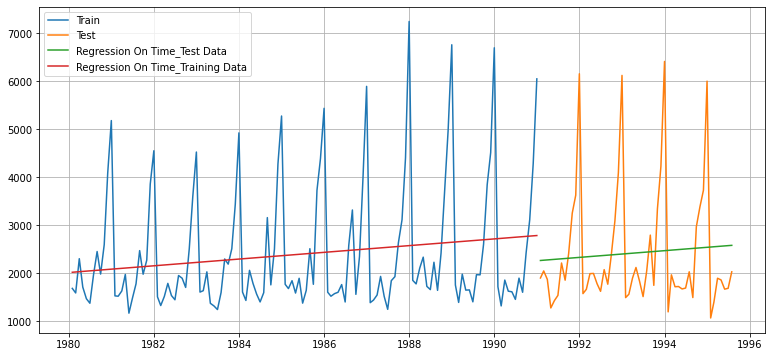

In [59]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();
plt.savefig('lr-train-test.png')

**performing metrics and model valuation**

In [60]:
from sklearn import metrics

In [61]:
## Training Data - RMSE 

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
print("Regression On Time forecast on the Training Data: \nRMSE is %3.3f" %(rmse_model1_train))

Regression On Time forecast on the Training Data: 
RMSE is 1279.322


In [62]:
## Test Data - RMSE 

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("Regression On Time forecast on the Test Data: \nRMSE is %3.3f" %(rmse_model1_test))

Regression On Time forecast on the Test Data: 
RMSE is 1275.867


In [63]:
results_df = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
results_df

Test RMSE
RegressionOnTime  1275.867052

### Model 2: Naive Forecast Model

In [64]:
Naive_train = train.copy()
Naive_test = test.copy()

In [65]:
Naive_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
Naive_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [66]:
Naive_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
Naive_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

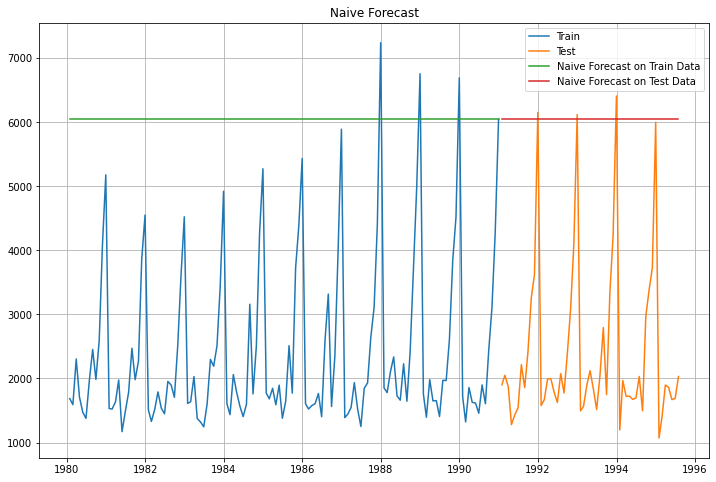

In [67]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(Naive_train['naive'], label='Naive Forecast on Train Data')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.savefig('Naive-train-test.png')

**performing metrics and model valuation**

In [68]:
## Training Data - RMSE 

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],Naive_train['naive'],squared=False)
print("Naive Model forecast on the Training Data,\nRMSE is %3.3f" %(rmse_model2_train))

Naive Model forecast on the Training Data,
RMSE is 3867.701


In [69]:
## Test Data - RMSE 

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],Naive_test['naive'],squared=False)
print("Naive Model forecast on the Test Data,\nRMSE is %3.3f" %(rmse_model2_test))

Naive Model forecast on the Test Data,
RMSE is 3864.279


In [70]:
results_df2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

results_df = pd.concat([results_df, results_df2])
results_df

Test RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

### Model3:Simple Average Model

In [71]:
#For this particular simple average method, 
#we will forecast by using the average of the training values.

In [72]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [73]:
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
Time_Stamp                          
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [74]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

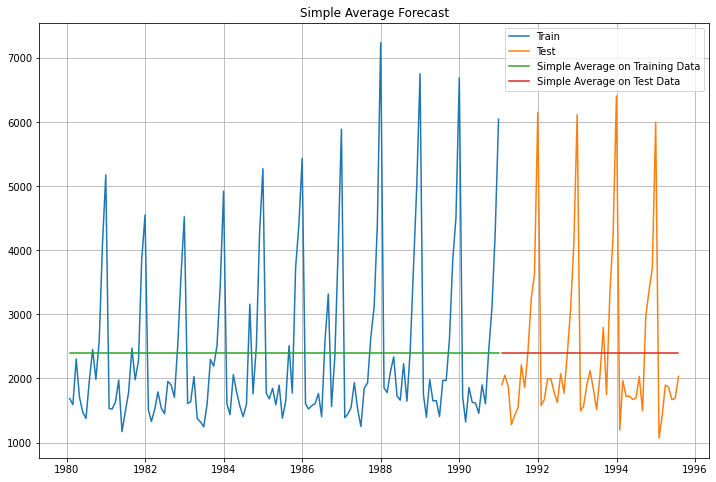

In [75]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();
plt.savefig('SA-train-test.png')

**performing metrics and model evaluation**

In [76]:
## Training Data - RMSE 

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
print("Simple Average Model forecast on the Training Data:\nRMSE is %3.3f" %(rmse_model3_train))

Simple Average Model forecast on the Training Data:
RMSE is 1298.484


In [77]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("Simple Average forecast on the Test Data:\nRMSE is %3.3f" %(rmse_model3_test))

Simple Average forecast on the Test Data:
RMSE is 1275.082


In [78]:
results_df3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

results_df = pd.concat([results_df, results_df3])
results_df

Test RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

### Model4:Moving Average Model

In [79]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [80]:
#Trailing moving averages
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

In [81]:
#While performing rolling windows we will get NaN values , so we have to be careful.

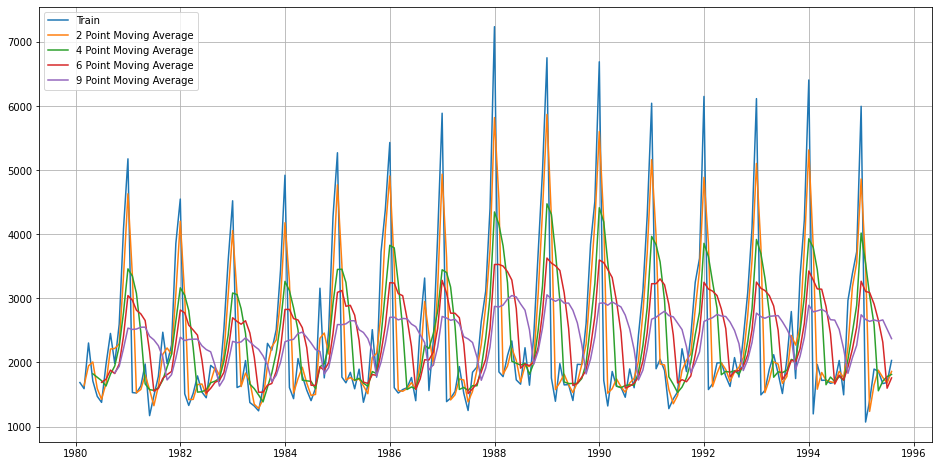

In [82]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [83]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [84]:
trailing_MovingAverage_train.tail()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1990-08-31       1605      1752.0     1644.00  1677.166667  2199.777778
1990-09-30       2424      2014.5     1846.25  1771.333333  1725.333333
1990-10-31       3116      2770.0     2261.00  2019.333333  1880.444444
1990-11-30       4286      3701.0     2857.75  2464.500000  2209.888889
1990-12-31       6047      5166.5     3968.25  3229.500000  2675.222222

In [85]:
trailing_MovingAverage_train.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

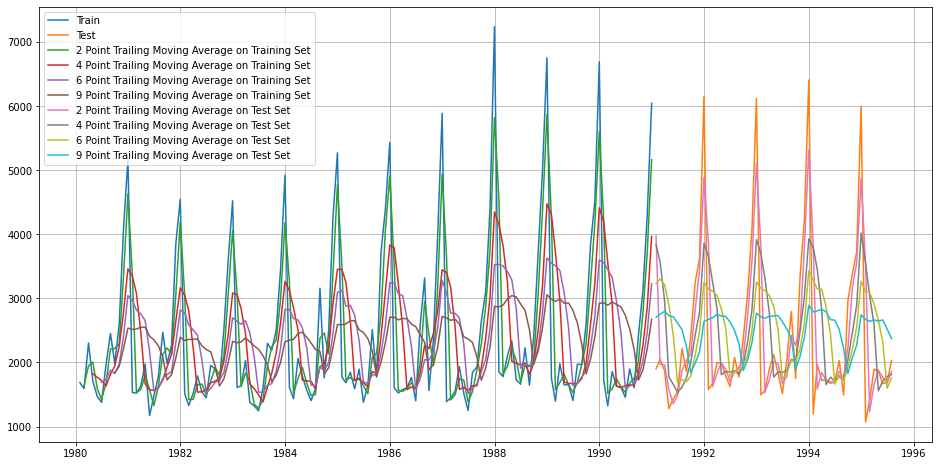

In [86]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

**performing metrics and model evaluation (for the test data)**

In [87]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("2 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_2))


## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("4 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_4))


## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("6 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("9 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_9))

2 point Moving Average Model forecast on the Testing Data:
RMSE is 813.401
4 point Moving Average Model forecast on the Testing Data:
RMSE is 1156.590
6 point Moving Average Model forecast on the Testing Data:
RMSE is 1283.927
9 point Moving Average Model forecast on the Testing Data:
RMSE is 1346.278


In [88]:
results_df4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_df = pd.concat([results_df, results_df4])
results_df

Test RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

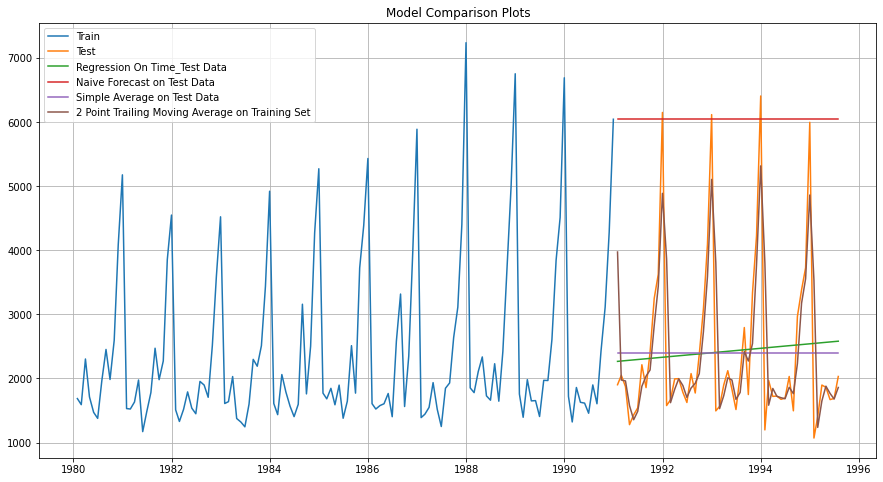

In [89]:
## Plotting on both Training and Test data

#plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model5:Simple Exponential Smoothing (automated)

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [92]:
SES_train = train.copy()
SES_test = test.copy()

In [93]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [94]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [95]:
print(model_SES_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              Sparkling   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                      228338410.448
Optimized:                       True   AIC                           1899.987
Trend:                           None   BIC                           1905.753
Seasonal:                        None   AICC                          1900.302
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:23:06
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0496066                alpha                 True
initial_level              1818.5048                

In [96]:
model_SES_autofit.params

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling      predict
Time_Stamp                        
1980-01-31       1686  1818.504754
1980-02-29       1591  1811.931644
1980-03-31       2304  1800.971977
1980-04-30       1712  1825.925486
1980-05-31       1471  1820.274030

In [98]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

Text(0.5, 1.0, 'Alpha =0.049 Predictions')

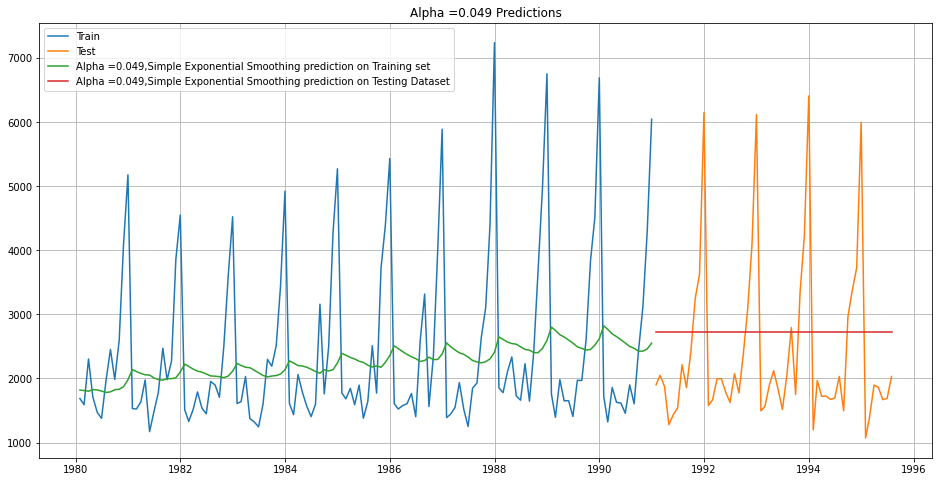

In [99]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.049,Simple Exponential Smoothing prediction on Training set')
plt.plot(SES_test['predict'], label='Alpha =0.049,Simple Exponential Smoothing prediction on Testing Dataset')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions')

In [100]:
## Training Data --RMSE

rmse_model5_train = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
print("Alpha =0.049 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_train))

Alpha =0.049 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1315.232


In [101]:
## Test Data --RMSE

rmse_model5_test = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("Alpha =0.049 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test))


Alpha =0.049 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1316.035


In [102]:
results_df5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df5])
results_df

Test RMSE
RegressionOnTime                    1275.867052
NaiveModel                          3864.279352
SimpleAverageModel                  1275.081804
2pointTrailingMovingAverage          813.400684
4pointTrailingMovingAverage         1156.589694
6pointTrailingMovingAverage         1283.927428
9pointTrailingMovingAverage         1346.278315
Alpha=0,SimpleExponentialSmoothing  1316.034674

In [103]:
#Setting different alpha values.

The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

### Model6:Simple Exponential Model with alpha in range of 0.01 to 0.1

In [104]:
## First we will define an empty dataframe to store our values from the loop
results_df6_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
results_df6_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [105]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model6_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model6_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    
    results_df6_model = results_df6_model.append({'Alpha Values':i,'Train RMSE':rmse_model6_train_i 
                                      ,'Test RMSE':rmse_model6_test_i}, ignore_index=True)

In [106]:
results_df6_model

Alpha Values    Test RMSE   Train RMSE
0           0.01  1276.251337  1302.063355
1           0.02  1283.553056  1303.192007
2           0.03  1294.721648  1305.212814
3           0.04  1305.943195  1308.368577
4           0.05  1316.543221  1312.159247
..           ...          ...          ...
94          0.95  3778.432623  1363.586031
95          0.96  3796.048620  1365.349773
96          0.97  3813.437370  1367.179921
97          0.98  3830.602869  1369.077800
98          0.99  3847.548965  1371.044831

[99 rows x 3 columns]

In [107]:
 results_df6_model.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values    Test RMSE   Train RMSE
0           0.01  1276.251337  1302.063355
1           0.02  1283.553056  1303.192007
2           0.03  1294.721648  1305.212814
3           0.04  1305.943195  1308.368577
4           0.05  1316.543221  1312.159247
..           ...          ...          ...
94          0.95  3778.432623  1363.586031
95          0.96  3796.048620  1365.349773
96          0.97  3813.437370  1367.179921
97          0.98  3830.602869  1369.077800
98          0.99  3847.548965  1371.044831

[99 rows x 3 columns]

In [108]:
model_SES_s = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_s_autofit = model_SES.fit(smoothing_level=0.01, optimized=True,use_brute=True)

In [109]:
print(model_SES_s_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              Sparkling   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                      223788705.587
Optimized:                       True   AIC                           1897.330
Trend:                           None   BIC                           1903.096
Seasonal:                        None   AICC                          1897.645
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:23:10
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0100000                alpha                False
initial_level              2357.6819                

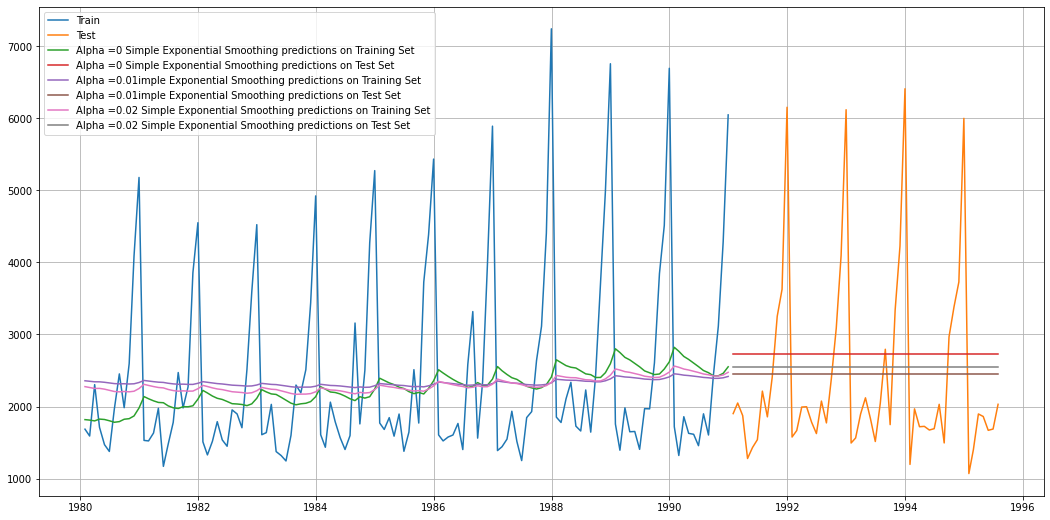

In [110]:
## Plotting on both the Training and Test data for top values of alpha

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.01], label='Alpha =0.01imple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.01], label='Alpha =0.01imple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [111]:
results_df6 = pd.DataFrame({'Test RMSE': [results_df6_model['Test RMSE'][0]]}
                           ,index=['Alpha=0.01,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df,results_df6 ])
results_df

Test RMSE
RegressionOnTime                       1275.867052
NaiveModel                             3864.279352
SimpleAverageModel                     1275.081804
2pointTrailingMovingAverage             813.400684
4pointTrailingMovingAverage            1156.589694
6pointTrailingMovingAverage            1283.927428
9pointTrailingMovingAverage            1346.278315
Alpha=0,SimpleExponentialSmoothing     1316.034674
Alpha=0.01,SimpleExponentialSmoothing  1276.251337

### Model7: Double Exponential Smoothing

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.¶

In [112]:
DES_train = train.copy()
DES_test = test.copy()

In [113]:
model_DES = Holt(DES_train['Sparkling'])

In [114]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [115]:
print(model_DES_autofit.summary())

                              Holt Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                           Holt   SSE                      240445440.041
Optimized:                       True   AIC                           1910.807
Trend:                       Additive   BIC                           1922.338
Seasonal:                        None   AICC                          1911.479
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:23:11
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6885714                alpha                 True
smoothing_trend               0.0001                

In [116]:
model_DES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.688571       True
smoothing_trend   beta     0.000100       True
initial_level      l.0  1686.000000       True
initial_trend      b.0   -95.000000       True

In [117]:
# predictions on training data
DES_train['predict',0.68,0.0] = model_DES_autofit.fittedvalues
DES_train.head()

Sparkling  (predict, 0.68, 0.0)
Time_Stamp                                 
1980-01-31       1686           1591.000000
1980-02-29       1591           1561.420827
1980-03-31       2304           1486.796779
1980-04-30       1712           1954.564417
1980-05-31       1471           1692.589636

In [118]:
DES_test['predict',0.68,0.0] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Sparkling  (predict, 0.68, 0.0)
Time_Stamp                                 
1991-01-31       1902           5221.278699
1991-02-28       2049           5127.886554
1991-03-31       1874           5034.494409
1991-04-30       1279           4941.102264
1991-05-31       1432           4847.710119

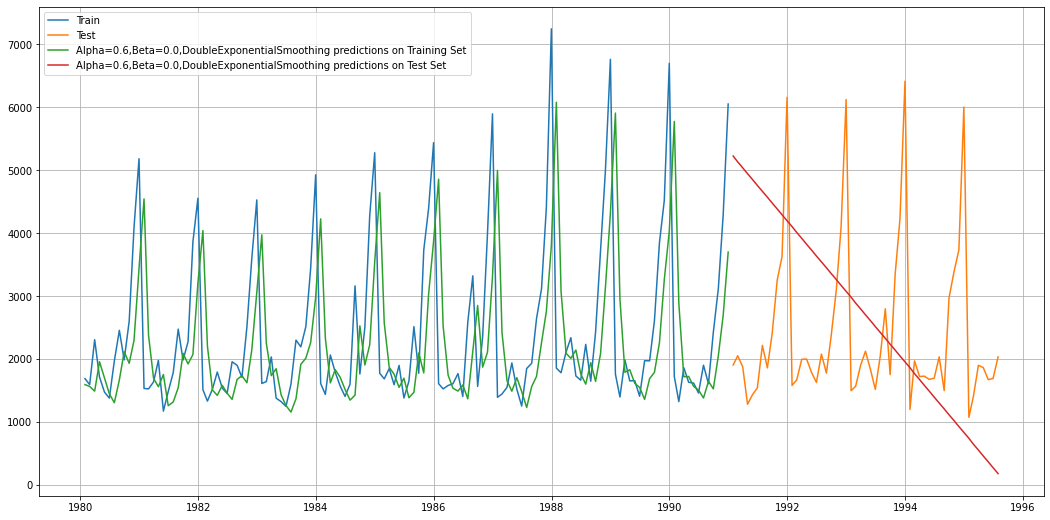

In [119]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.68, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.68, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [120]:
## Training Data --RMSE

rmse_model7_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',0.68,0.0],squared=False)
print("Alpha=0.68 and Beta=0 Double Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_train))

Alpha=0.68 and Beta=0 Double Exponential Smoothing Model forecast on the Training Data,  RMSE is 1349.650


In [121]:
## Test Data --RMSE

rmse_model7_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',0.68,0.0],squared=False)
print("Alpha=0.68 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model7_test))


Alpha=0.68 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is 2007.239


In [122]:
results_df7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]}
                           ,index=['Alpha=0.64 and Beta=0,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df7])
results_df

Test RMSE
RegressionOnTime                                  1275.867052
NaiveModel                                        3864.279352
SimpleAverageModel                                1275.081804
2pointTrailingMovingAverage                        813.400684
4pointTrailingMovingAverage                       1156.589694
6pointTrailingMovingAverage                       1283.927428
9pointTrailingMovingAverage                       1346.278315
Alpha=0,SimpleExponentialSmoothing                1316.034674
Alpha=0.01,SimpleExponentialSmoothing             1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing  2007.238526

### Model:8 Double Exponential Smoothing Model in range 0.01 to 1

In [123]:
DES_train_d = train.copy()
DES_test_d = test.copy()

In [124]:
model_DES_d = Holt(DES_train_d['Sparkling'])

In [125]:
## First we will define an empty dataframe to store our values from the loop

results_df_d = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
results_df_d

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [126]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_d_alpha_i_beta_j = model_DES_d.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train_d['predict',i,j] = model_DES_d_alpha_i_beta_j.fittedvalues
        DES_test_d['predict',i,j] = model_DES_d_alpha_i_beta_j.forecast(steps=len(DES_test_d))
        
        rmse_model8_train = metrics.mean_squared_error(DES_train_d['Sparkling'],DES_train_d['predict',i,j],squared=False)
        
        rmse_model8_test = metrics.mean_squared_error(DES_test_d['Sparkling'],DES_test_d['predict',i,j],squared=False)
        
        results_df_d = results_df_d.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model8_train
                                      ,'Test RMSE':rmse_model8_test}, ignore_index=True)

In [127]:
results_df_d

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1590.151686  18259.110704
1            0.3          0.4  1680.813420  26069.841401
2            0.3          0.5  1770.490574  34401.512440
3            0.3          0.6  1847.943369  42162.748095
4            0.3          0.7  1899.677008  47832.397419
..           ...          ...          ...           ...
59           1.0          0.6  1753.362276  49327.087977
60           1.0          0.7  1825.157066  52655.765663
61           1.0          0.8  1901.992966  55442.273880
62           1.0          0.9  1985.350646  57823.177011
63           1.0          1.0  2077.639251  59877.076519

[64 rows x 4 columns]

In [128]:
results_df_d.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1590.151686  18259.110704
8            0.4          0.3  1568.527729  23878.496940
1            0.3          0.4  1680.813420  26069.841401
16           0.5          0.3  1530.223975  27095.532414
24           0.6          0.3  1506.223119  29070.722592
..           ...          ...          ...           ...
39           0.7          1.0  1816.804334  57297.154185
62           1.0          0.9  1985.350646  57823.177011
47           0.8          1.0  1872.547666  57990.117908
55           0.9          1.0  1947.975429  59008.254331
63           1.0          1.0  2077.639251  59877.076519

[64 rows x 4 columns]

In [129]:
model_DES_d = Holt(DES_train_d['Sparkling'])
Holt_model_results = model_DES_d.fit(smoothing_level=0.3,smoothing_slope=0.3,optimized=True,use_brute=True)

In [130]:
print(Holt_model_results.summary())

                              Holt Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                           Holt   SSE                      333772874.885
Optimized:                       True   AIC                           1954.098
Trend:                       Additive   BIC                           1965.630
Seasonal:                        None   AICC                          1954.770
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:23:14
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.3000000                

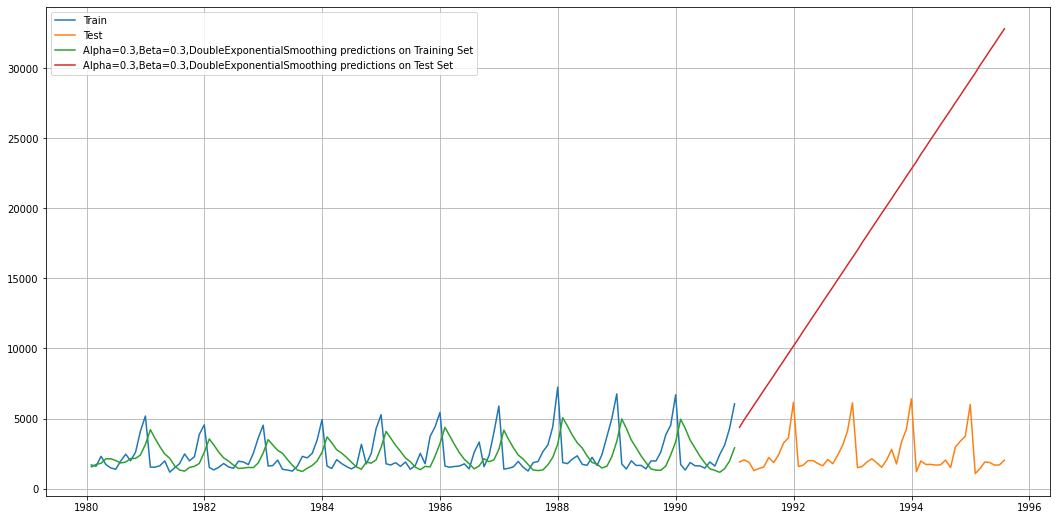

In [131]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_d['Sparkling'], label='Train')
plt.plot(DES_test_d['Sparkling'], label='Test')

plt.plot(DES_train_d['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_d['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [132]:
results_df8 = pd.DataFrame({'Test RMSE': [results_df_d['Test RMSE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df8])
results_df

Test RMSE
RegressionOnTime                                   1275.867052
NaiveModel                                         3864.279352
SimpleAverageModel                                 1275.081804
2pointTrailingMovingAverage                         813.400684
4pointTrailingMovingAverage                        1156.589694
6pointTrailingMovingAverage                        1283.927428
9pointTrailingMovingAverage                        1346.278315
Alpha=0,SimpleExponentialSmoothing                 1316.034674
Alpha=0.01,SimpleExponentialSmoothing              1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing     18259.110704

### Model:9 Triple Exponential Smoothing (automated)

In [133]:
TES_train = train.copy()
TES_test = test.copy()

In [134]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'], freq='M', trend='additive',seasonal='additive')

In [135]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [136]:
model_TES_autofit.params

{'smoothing_level': 0.11251389383851898,
 'smoothing_trend': 0.037513905124479975,
 'smoothing_seasonal': 0.493687892134789,
 'damping_trend': nan,
 'initial_level': 1640.1903994601003,
 'initial_trend': -2.883527455748493,
 'initial_seasons': array([  45.90357842,  -48.98920376,  662.93554561,   72.68953516,
        -168.88494907, -262.45259553,  326.06601139,  813.23429222,
         344.33124094,  956.08513572, 2446.81371315, 3538.45996852]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [137]:
print(model_TES_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                       18691172.409
Optimized:                         True   AIC                           1597.620
Trend:                         Additive   BIC                           1643.745
Seasonal:                      Additive   AICC                          1603.673
Seasonal Periods:                    12   Date:                 Wed, 23 Feb 2022
Box-Cox:                          False   Time:                         20:23:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1125139                alpha                 True
smoothing_trend          

In [138]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
Time_Stamp                         
1980-01-31       1686   1683.210450
1980-02-29       1591   1585.759778
1980-03-31       2304   2295.424490
1980-04-30       1712   1703.329904
1980-05-31       1471   1459.954082

In [139]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1474.614638
1991-02-28       2049   1169.444327
1991-03-31       1874   1658.498607
1991-04-30       1279   1504.366522
1991-05-31       1432   1417.164025

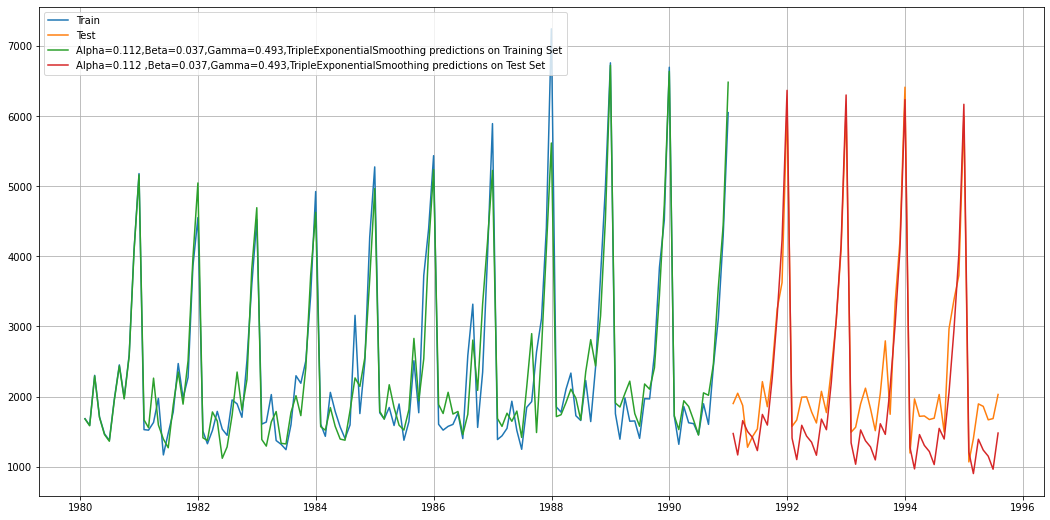

In [140]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.112,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.112 ,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [141]:
## Training Data --RMSE

rmse_model9_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
print("Alpha: 0.112,Beta: 0.037 and Gamma:0.493, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model9_train))

Alpha: 0.112,Beta: 0.037 and Gamma:0.493, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 376.297


In [142]:
## Test Data --RMSE

rmse_model9_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("Alpha: 0.112,Beta: 0.037 and Gamma:0.493, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model9_test))

Alpha: 0.112,Beta: 0.037 and Gamma:0.493, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 473.954 


In [143]:
results_df9 = pd.DataFrame({'Test RMSE': [rmse_model9_test]}
                           ,index=['Alpha: 0.112,Beta: 0.037 and Gamma:0.493,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df9])
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384

### Model10:Triple Exponential Smoothing in range 0.3 to 1.1

In [144]:
## First we will define an empty dataframe to store our values from the loop

results_df_t = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
results_df_t

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [145]:
TES_train_t = train.copy()
TES_test_t = test.copy()

In [146]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_t_alpha_i_beta_j_gamma_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.fittedvalues
            TES_test_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.forecast(steps=len(TES_test_t))
        
            rmse_model10_train = metrics.mean_squared_error(TES_train_t['Sparkling'],TES_train_t['predict',i,j,k],squared=False)
        
            rmse_model10_test = metrics.mean_squared_error(TES_test_t['Sparkling'],TES_test_t['predict',i,j,k],squared=False)
        
            results_df_t = results_df_t.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model10_train
                                      ,'Test RMSE':rmse_model10_test}, ignore_index=True)

In [147]:
results_df_t

Alpha Values  Beta Values  Gamma Values  Train RMSE     Test RMSE
0             0.3          0.3           0.3  438.000691   2154.245698
1             0.3          0.3           0.4  431.895578   3425.355246
2             0.3          0.3           0.5  431.673314   4147.821832
3             0.3          0.3           0.6  436.348352   4325.625411
4             0.3          0.3           0.7  445.304617   4092.457602
..            ...          ...           ...         ...           ...
507           1.0          1.0           0.6  657.398584  13067.185599
508           1.0          1.0           0.7  526.050879   7560.549326
509           1.0          1.0           0.8  440.774937   5209.108496
510           1.0          1.0           0.9  381.627414   4100.855487
511           1.0          1.0           1.0  337.994521   3639.322001

[512 rows x 5 columns]

In [148]:
results_df_t.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Gamma Values  Train RMSE     Test RMSE
280           0.7          0.6           0.3  533.517574    387.732328
328           0.8          0.4           0.3  522.400400    389.253701
178           0.5          0.9           0.5  554.997699    389.813457
290           0.7          0.7           0.5  590.842363    390.441654
168           0.5          0.8           0.3  512.031228    393.196534
..            ...          ...           ...         ...           ...
489           1.0          0.8           0.4  835.728124  29308.267401
496           1.0          0.9           0.3  852.142556  35779.064449
497           1.0          0.9           0.4  874.232337  36190.851129
505           1.0          1.0           0.4  895.557121  41717.834760
504           1.0          1.0           0.3  914.734293  45252.888467

[512 rows x 5 columns]

In [149]:
model_TES_t = ExponentialSmoothing(TES_train_t['Sparkling'], freq='M', trend='additive',seasonal='additive')
model_TES_t_autofit = model_TES_t.fit(smoothing_level=0.4,smoothing_slope=0.4,smoothing_seasonal=0.3,optimized=True,use_brute=True)

In [150]:
print(model_TES_t_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                       27763707.765
Optimized:                         True   AIC                           1649.850
Trend:                         Additive   BIC                           1695.975
Seasonal:                      Additive   AICC                          1655.903
Seasonal Periods:                    12   Date:                 Wed, 23 Feb 2022
Box-Cox:                          False   Time:                         20:23:52
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4000000                alpha                False
smoothing_trend          

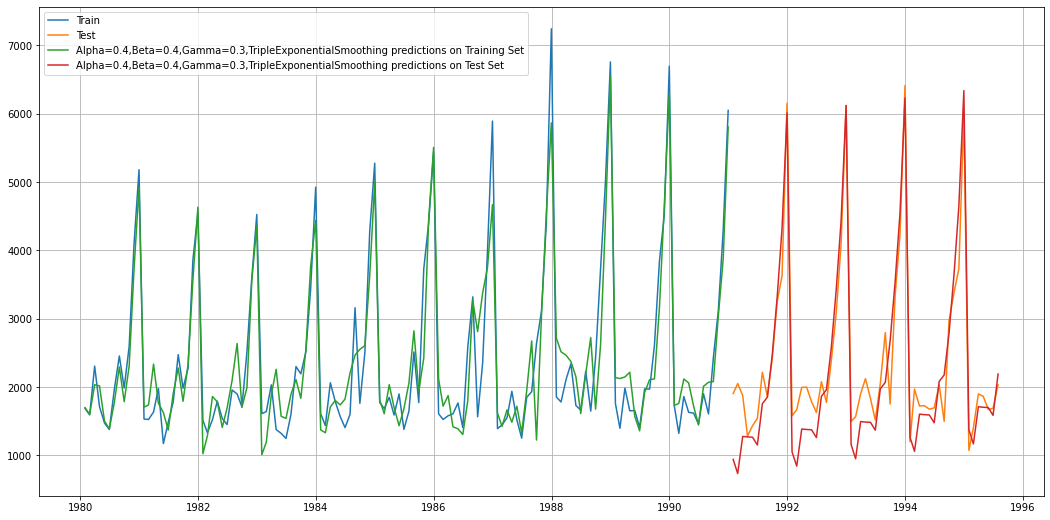

In [151]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_t['Sparkling'], label='Train')
plt.plot(TES_test_t['Sparkling'], label='Test')

plt.plot(TES_train_t['predict', 0.4, 0.4, 0.3], label='Alpha=0.4,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_t['predict', 0.4, 0.4, 0.3], label='Alpha=0.4,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [152]:
results_df10 = pd.DataFrame({'Test RMSE': [results_df_t['Test RMSE'][72]]}
                           ,index=['Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df10])
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831

In [153]:
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831

In [154]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
SimpleAverageModel                                   1275.081804
RegressionOnTime                                     1275.867052
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
6pointTrailingMovingAverage                          1283.927428
Alpha=0,SimpleExponentialSmoothing                   1316.034674
9pointTrailingMovingAverage                          1346.278315
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.4, $\beta$ = 0.3 and $\gamma$ = 0.3.

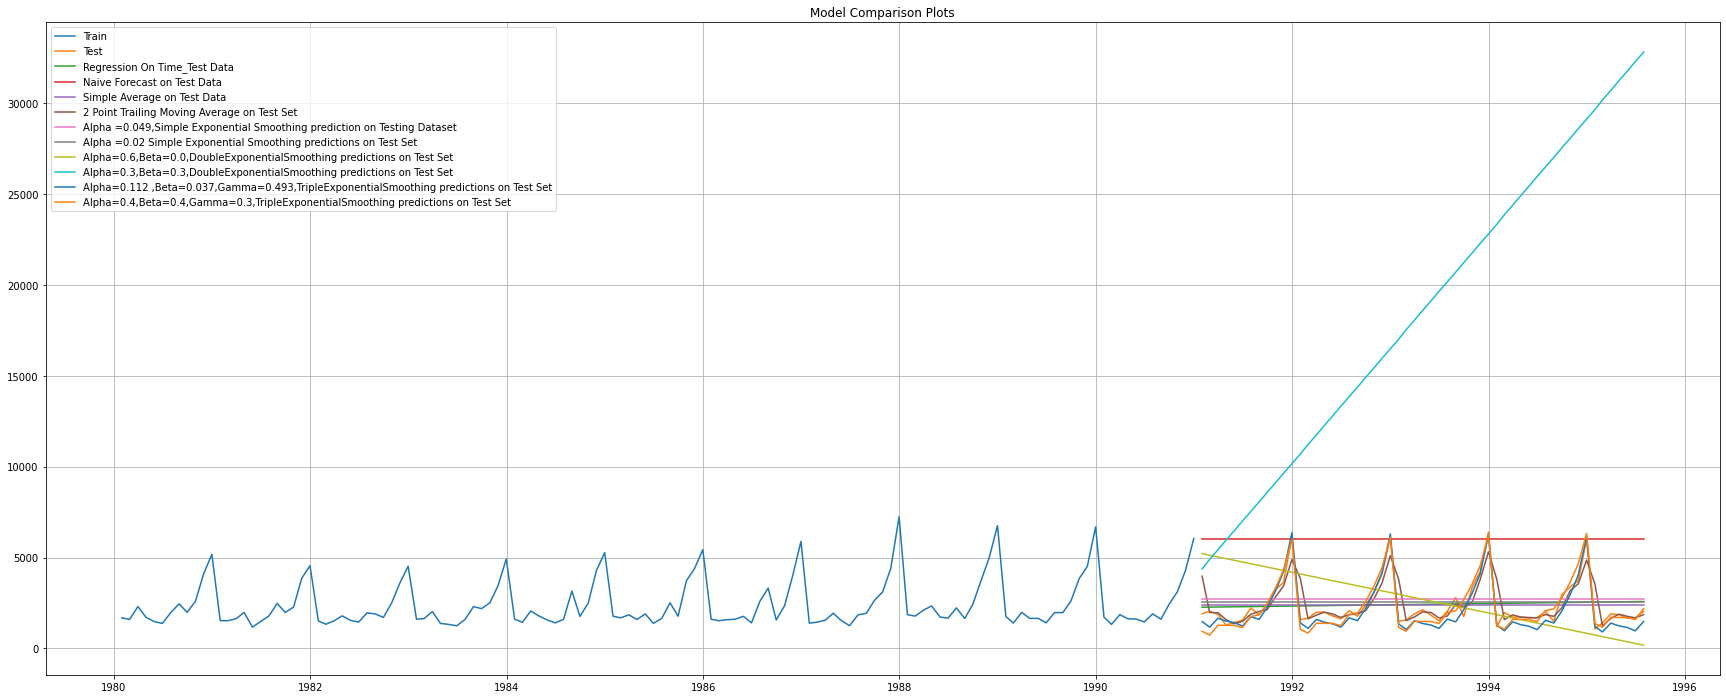

In [155]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(SES_test['predict'], label='Alpha =0.049,Simple Exponential Smoothing prediction on Testing Dataset')
plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.68, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test_d['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.112 ,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test_t['predict', 0.4, 0.4, 0.3], label='Alpha=0.4,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. 

Note: Stationarity should be checked at alpha = 0.05.

In [156]:
#Check for stationarity of the series at α = 0.05 using appropriate statistical tests.

In [157]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

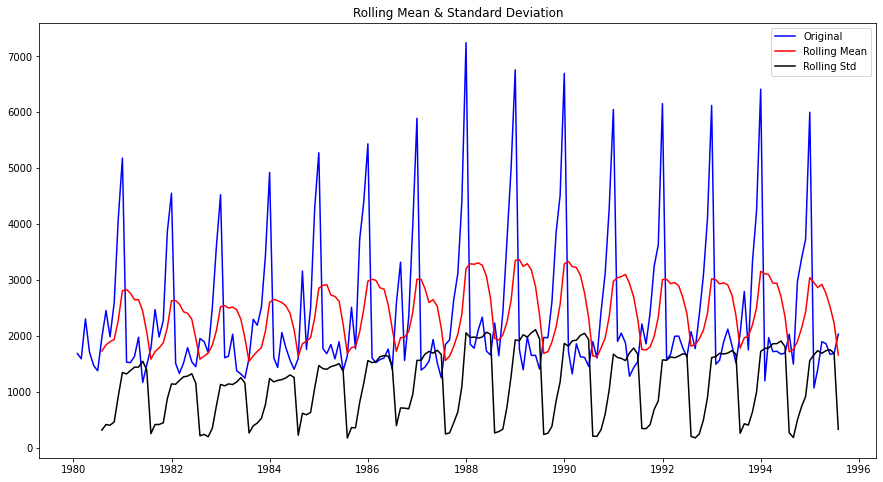

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [158]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

In [159]:
# the null hypothesis  for ADF test (H0) is that the time series is non-stationary 
# the alternate hypothesis for ADF test (H1) is that time series is stationary

# since the p-value of the ADF test is greater than the critical value at 5%, we cannot reject the null hypothesis 
# thus the given time given series is non stationary

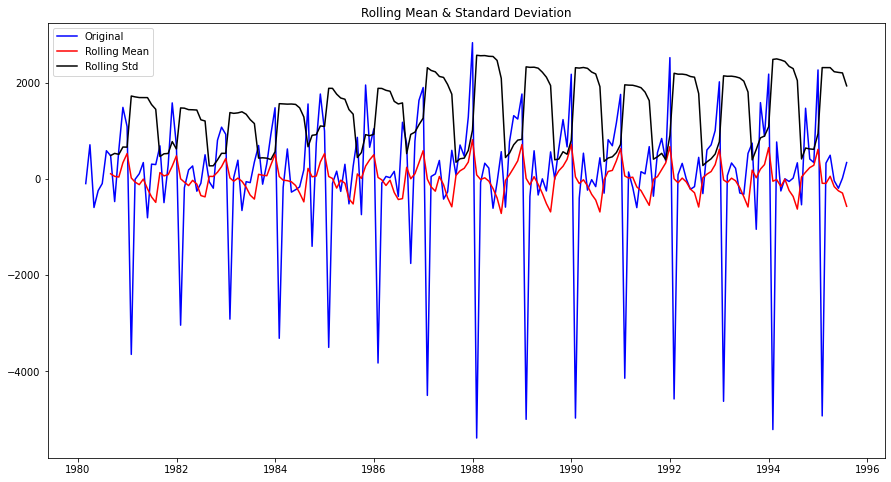

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [160]:
test_stationarity(df['Sparkling'].diff().dropna())

After taking a difference of order 1, we see that at α = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

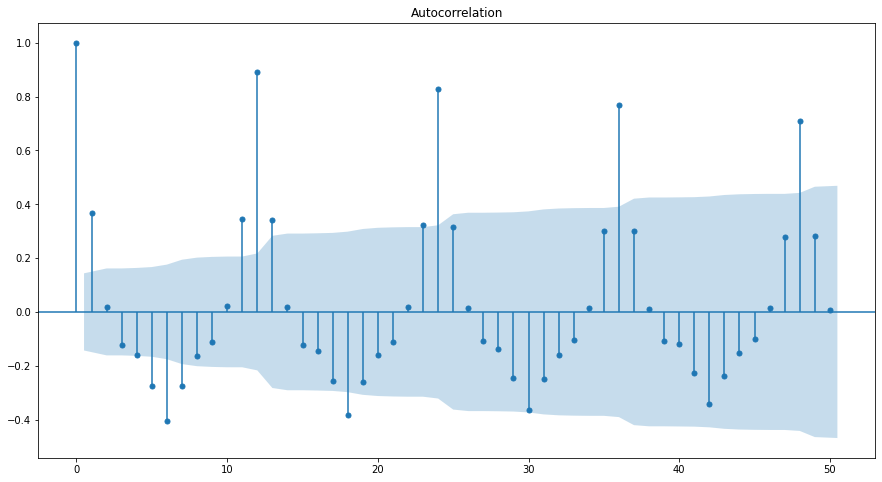

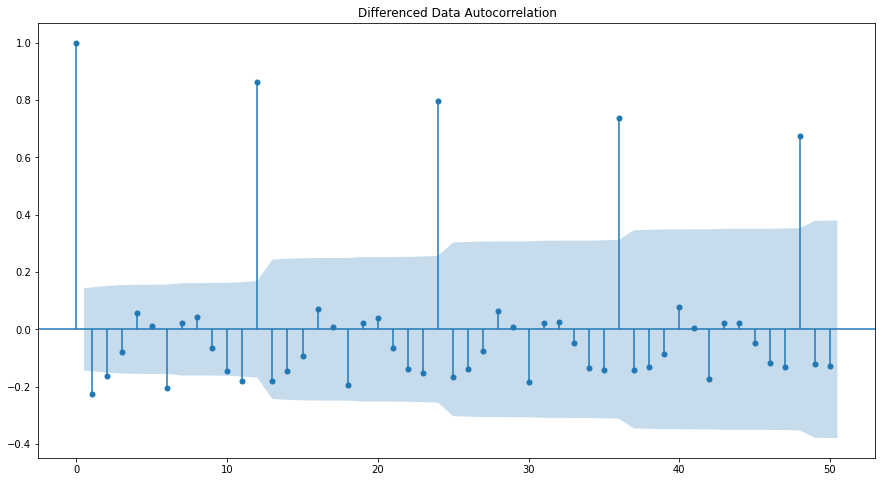

In [162]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

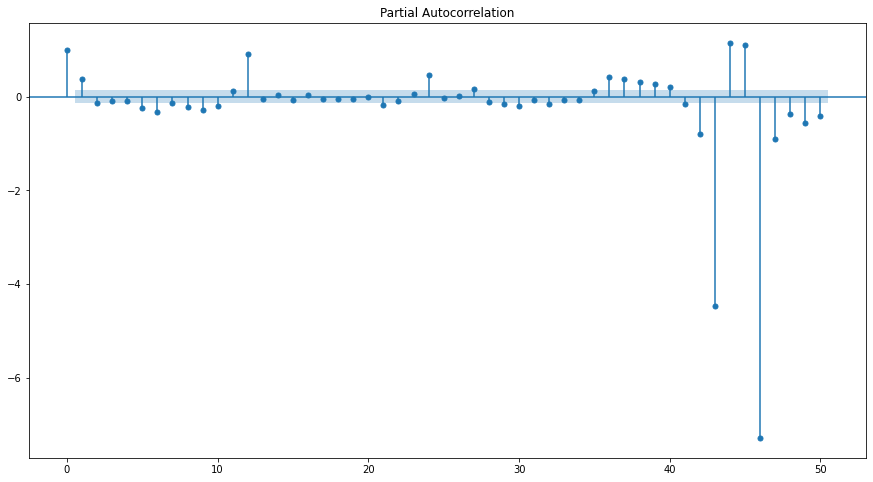

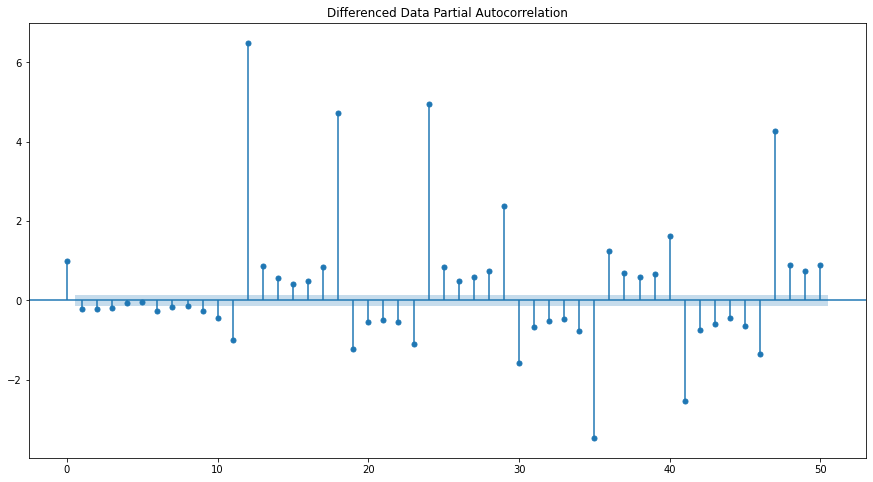

In [163]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Check for stationarity of the Training Data Time Series.

In [164]:
#We check for the stationarity only for training data.

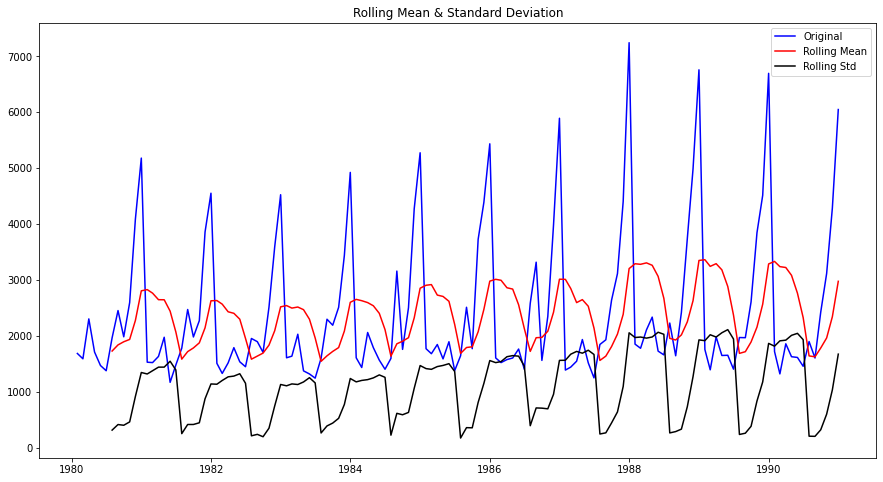

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [165]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at  𝛼  = 0.05.

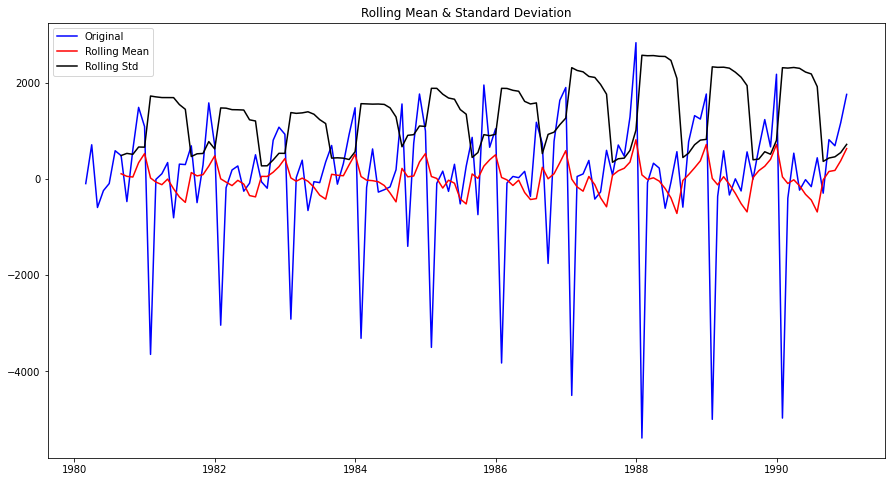

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [166]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

### Model11: Automated ARIMA based on AIC criteria

The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

In [168]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [169]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [170]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(0, 1, 3) - AIC:2233.9948577624864
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.527200452325
ARIMA(1, 1, 3) - AIC:2235.607812178285
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.5092126110794
ARIMA(2, 1, 3) - AIC:2232.9861669928914
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498607037124
ARIMA(3, 1, 2) - AIC:2230.753752431717
ARIMA(3, 1, 3) - AIC:2221.4513541225133


In [171]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.451354
14  (3, 1, 2)  2230.753752
11  (2, 1, 3)  2232.986167
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.498607
7   (1, 1, 3)  2235.607812
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [172]:
arima = ARIMA(train['Sparkling'], order=(2,1,2))

results_Arima = arima.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 23 Feb 2022   AIC                           2213.509
Time:                        20:24:03   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.214      0.0

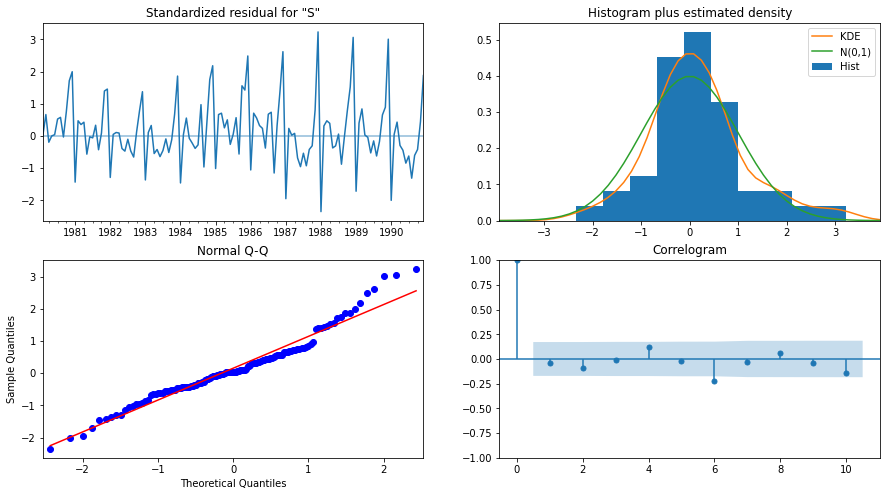

In [173]:
results_Arima.plot_diagnostics();

In [174]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-31    4252.342838
1991-02-28    2863.083884
1991-03-31    2043.969041
1991-04-30    1746.206779
1991-05-31    1813.636345
1991-06-30    2068.647214
1991-07-31    2365.535326
1991-08-31    2612.457939
1991-09-30    2770.398956
1991-10-31    2839.532129
1991-11-30    2841.906858
1991-12-31    2806.357081
1992-01-31    2758.383882
1992-02-29    2715.320748
1992-03-31    2685.648458
1992-04-30    2670.800198
1992-05-31    2667.913216
1992-06-30    2672.429714
1992-07-31    2679.970501
1992-08-31    2687.338759
1992-09-30    2692.789180
1992-10-31    2695.819690
1992-11-30    2696.747657
1992-12-31    2696.270306
1993-01-31    2695.124965
1993-02-28    2693.889138
1993-03-31    2692.908183
1993-04-30    2692.312257
1993-05-31    2692.078980
1993-06-30    2692.106194
1993-07-31    2692.272370
1993-08-31    2692.475192
1993-09-30    2692.648373
1993-10-31    2692.762168
1993-11-30    2692.814621
1993-12-31    2692.819799
1994-01-31    2692.797257
1994-02-28    2692.764784
1994-03-31  

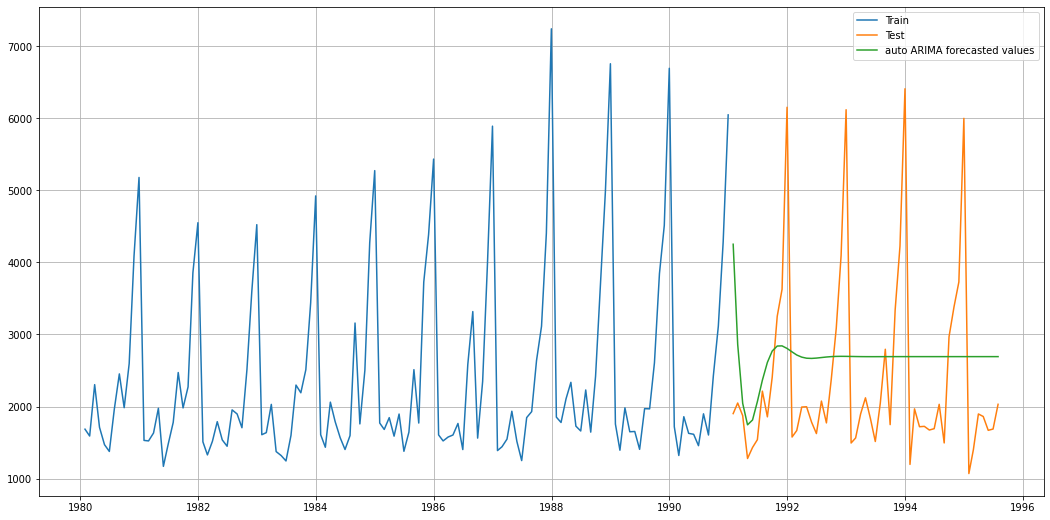

In [175]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_autoARIMA, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [176]:
from sklearn.metrics import mean_squared_error

In [177]:
RMSE_autoARIMA = mean_squared_error(test['Sparkling'],predicted_autoARIMA,squared=False)
print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA)

RMSE for the autofit ARIMA model: 1299.979523620647


In [178]:
results_df11 = pd.DataFrame({'Test RMSE': [RMSE_autoARIMA]}
                           ,index=['automated ARIMA(2,1,2)'])

results_df = pd.concat([results_df, results_df11])
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
automated ARIMA(2,1,2)                               1299.979524

### Model:12 Automated SARIMA model with seasonality 6 &12

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

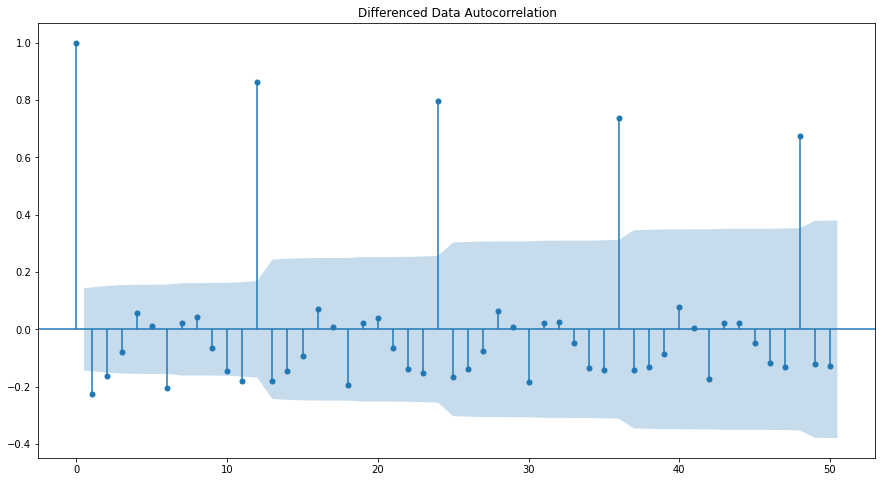

In [179]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

In [180]:
#Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [181]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [182]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [183]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536889566
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442702
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.936012243389
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510657
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657978
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082847
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339545129
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878703
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298140362
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274221413
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885105333244
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793347059
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6473538896798
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [184]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678698
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888804
80  (2, 1, 2)  (2, 0, 2, 6)  1729.321425
17  (0, 1, 1)  (2, 0, 2, 6)  1741.647354
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778

In [185]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Wed, 23 Feb 2022   AIC                           1727.679
Time:                                   20:25:01   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.257      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

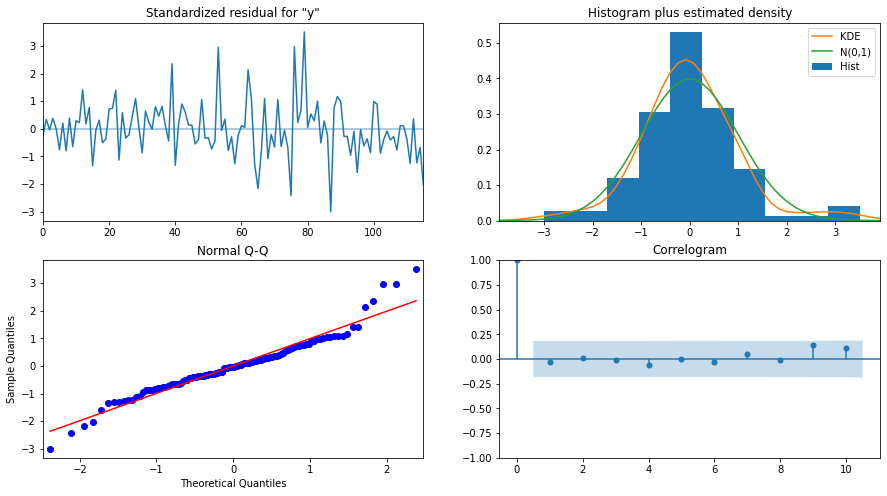

In [186]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [187]:
#Predict on the Test Set using this model and evaluate the model.

In [188]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [189]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.372526  380.562334     584.484058    2076.260995
1  1177.279252  392.114558     408.748841    1945.809663
2  1625.918648  392.308696     857.007732    2394.829564
3  1546.320520  397.709555     766.824115    2325.816925
4  1308.739060  398.928817     526.852946    2090.625175

In [190]:
RMSE_autoSARIMA6 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print('RMSE for the autofit ARIMA model:',RMSE_autoSARIMA6)

RMSE for the autofit ARIMA model: 626.9256927299741


In [191]:
results_df12 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA6]}
                           ,index=['automatedSARIMA(1,1,2)(2,0,2,6)'])


results_df = pd.concat([results_df,results_df12])

results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
automated ARIMA(2,1,2)                               1299.979524
automatedSARIMA(1,1,2)(2,0,2,6)                       626.925693

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [192]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [193]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [194]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616843673
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237064
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388897
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792024
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609953
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920729
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566396
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573047608
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838295
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193762963
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144546217
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175527
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085138572
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401882773793
SARIMA(0, 1,

In [195]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.929654
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121565
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340405

In [196]:
import statsmodels.api as sm

sarima = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = sarima.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 23 Feb 2022   AIC                           1555.584
Time:                                    20:26:20   BIC                           1574.095
Sample:                                01-31-1980   HQIC                          1563.084
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.254     -2.474      0.013      -1.126      -0.131
ma.L1         -0.1033      0.224   

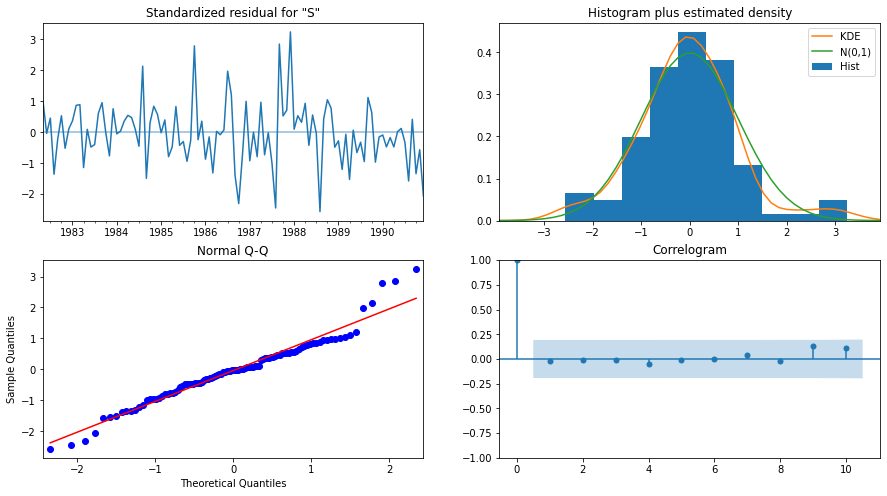

In [197]:
results_SARIMA.plot_diagnostics();

In [198]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1991-01-31    1326.676997
1991-02-28    1315.875630
1991-03-31    1621.363921
1991-04-30    1599.264079
1991-05-31    1392.729023
1991-06-30    1225.165793
1991-07-31    1780.513357
1991-08-31    1787.742486
1991-09-30    2192.705348
1991-10-31    3184.332859
1991-11-30    4490.460713
1991-12-31    6524.660081
1992-01-31    1306.981276
1992-02-29    1173.295122
1992-03-31    1572.121478
1992-04-30    1504.746358
1992-05-31    1306.944211
1992-06-30    1096.281392
1992-07-31    1717.119193
1992-08-31    1784.476628
1992-09-30    2126.547168
1992-10-31    3224.732851
1992-11-30    4586.859179
1992-12-31    6765.286666
1993-01-31    1251.433832
1993-02-28    1075.158412
1993-03-31    1514.549370
1993-04-30    1429.722602
1993-05-31    1232.353987
1993-06-30    1006.730327
1993-07-31    1658.389827
1993-08-31    1726.442427
1993-09-30    2084.933405
1993-10-31    3230.387842
1993-11-30    4652.809657
1993-12-31    6926.418984
1994-01-31    1170.980187
1994-02-28     986.835385
1994-03-31  

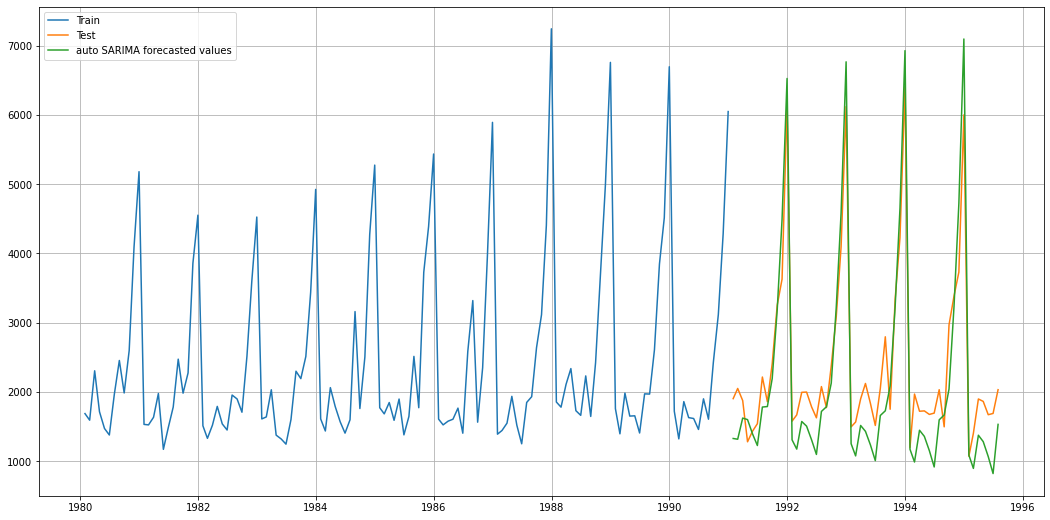

In [199]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_autoSARIMA, label='auto SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [200]:
RMSE_autoSARIMA = mean_squared_error(test['Sparkling'],predicted_autoSARIMA,squared=False)
print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA)

RMSE for the autofit SARIMA model: 528.389740110892


In [201]:
results_df13 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA]}
                           ,index=['automated SARIMA(1,1,2)*(1,0,2,12)'])

results_df = pd.concat([results_df, results_df13])
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
automated ARIMA(2,1,2)                               1299.979524
automatedSARIMA(1,1,2)(2,0,2,6)                       626.925693
automated SARIMA(1,1,2)*(1,0,2,12)                    528.389740

We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Model13: Manual ARIMA with cut-off values from ACF and PACF graphs

In [202]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

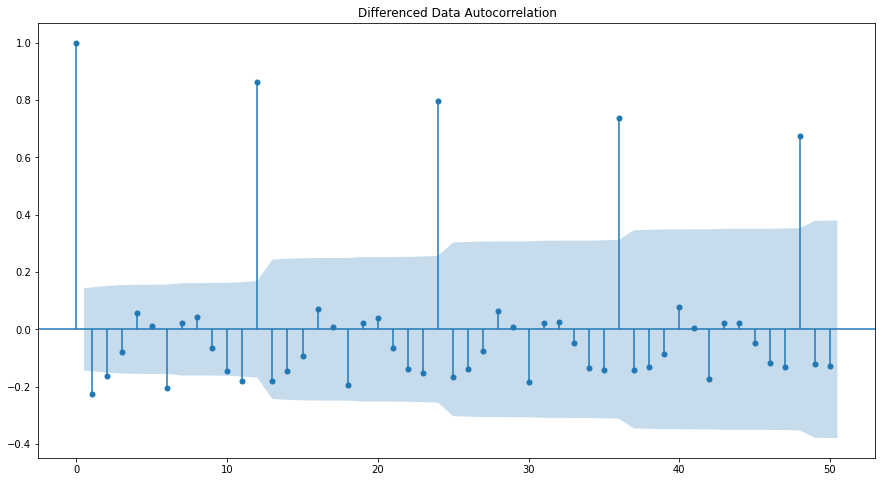

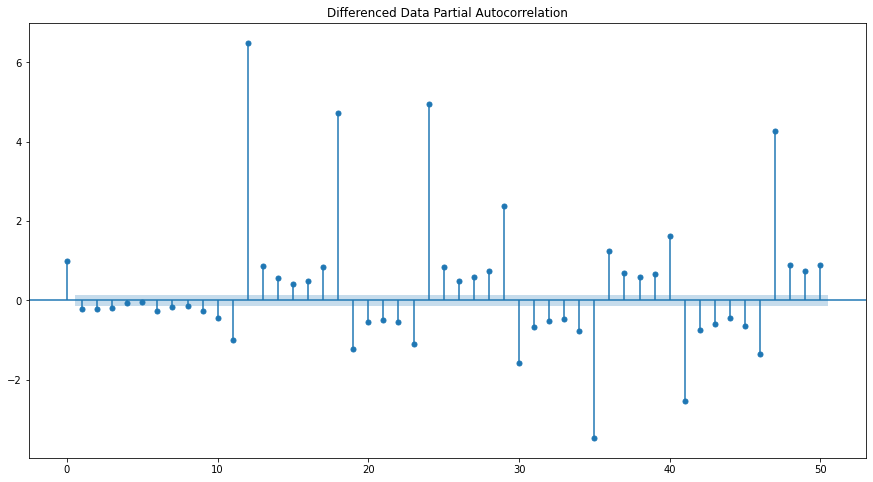

In [203]:
plot_acf(df['Sparkling'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

The p value from PACF is 3 as there are 3 significant values above the cut-off 

The q value from ACF is 2 as there are 2 significant values above the cut-off 

The d values is 1 as we need single order differencing to make the series stationary

In [204]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.377
Date:                Wed, 23 Feb 2022   AIC                           2230.754
Time:                        20:26:23   BIC                           2248.005
Sample:                    01-31-1980   HQIC                          2237.764
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4330      0.042    -10.396      0.000      -0.515      -0.351
ar.L2          0.3259      0.112      2.903      0.004       0.106       0.546
ar.L3         -0.2411      0.071     -3.415      0.0

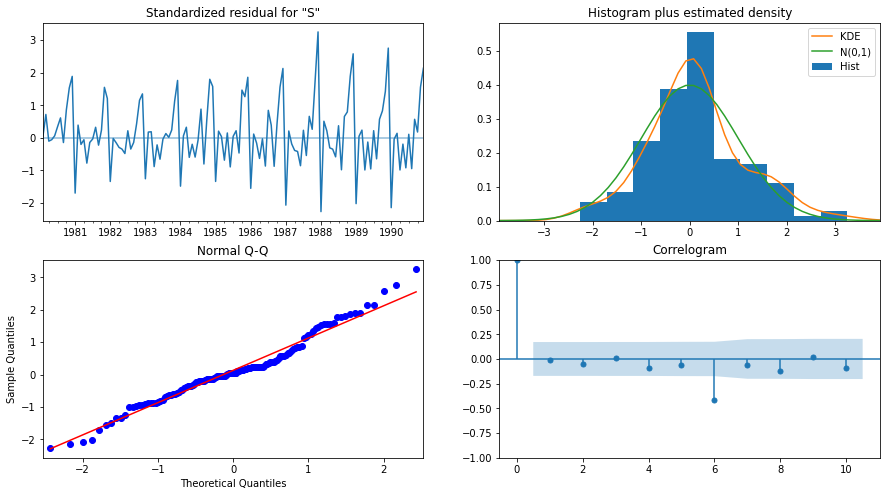

In [205]:
results_manual_ARIMA.plot_diagnostics();

In [206]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [207]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
predicted_manual_ARIMA

1991-01-31    3820.421010
1991-02-28    2725.596884
1991-03-31    2049.566846
1991-04-30    2522.398677
1991-05-31    2361.323709
1991-06-30    2748.144955
1991-07-31    2414.146961
1991-08-31    2723.665034
1991-09-30    2387.531860
1991-10-31    2714.477495
1991-11-30    2388.739963
1991-12-31    2717.377567
1992-01-31    2390.092952
1992-02-29    2717.445396
1992-03-31    2389.805237
1992-04-30    2717.265878
1992-05-31    2389.772867
1992-06-30    2717.290768
1992-07-31    2389.794824
1992-08-31    2717.297175
1992-09-30    2389.793203
1992-10-31    2717.294671
1992-11-30    2389.792214
1992-12-31    2717.294673
1993-01-31    2389.792495
1993-02-28    2717.294791
1993-03-31    2389.792535
1993-04-30    2717.294745
1993-05-31    2389.792539
1993-06-30    2717.294718
1993-07-31    2389.792564
1993-08-31    2717.294698
1993-09-30    2389.792587
1993-10-31    2717.294675
1993-11-30    2389.792609
1993-12-31    2717.294652
1994-01-31    2389.792632
1994-02-28    2717.294630
1994-03-31  

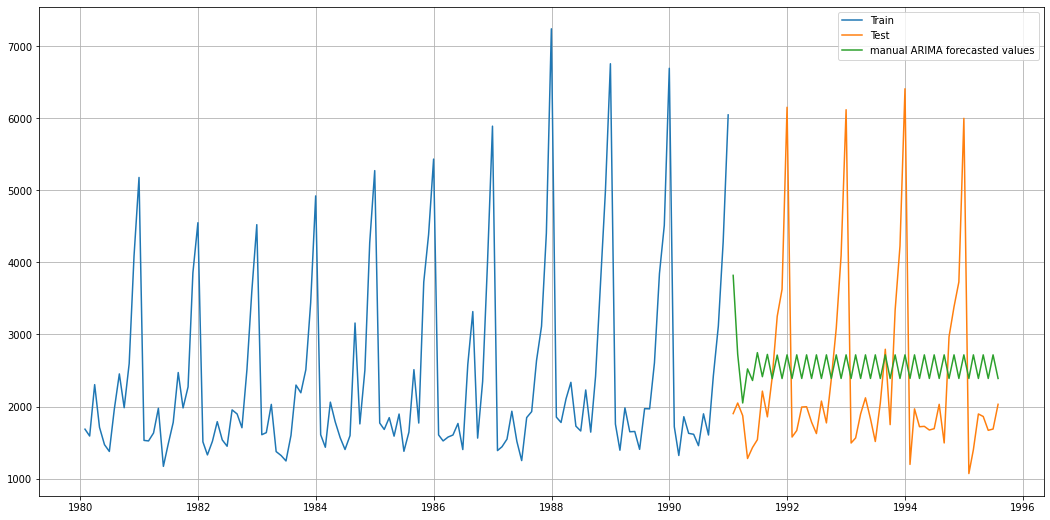

In [208]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_ARIMA, label='manual ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [209]:
from sklearn.metrics import mean_squared_error

In [210]:
RMSE_manual_ARIMA = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print('RMSE for the manual ARIMA model:',RMSE_manual_ARIMA)

RMSE for the manual ARIMA model: 1283.3528418167834


In [211]:
results_df14 = pd.DataFrame({'Test RMSE': [RMSE_manual_ARIMA]}
                           ,index=['manual ARIMA(3,1,2)'])

results_df = pd.concat([results_df, results_df14])
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
automated ARIMA(2,1,2)                               1299.979524
automatedSARIMA(1,1,2)(2,0,2,6)                       626.925693
automated SARIMA(1,1,2)*(1,0,2,12)                    528.389740
manual ARIMA(3,1,2)                                  1283.352842

### Model14: manual SARIMA

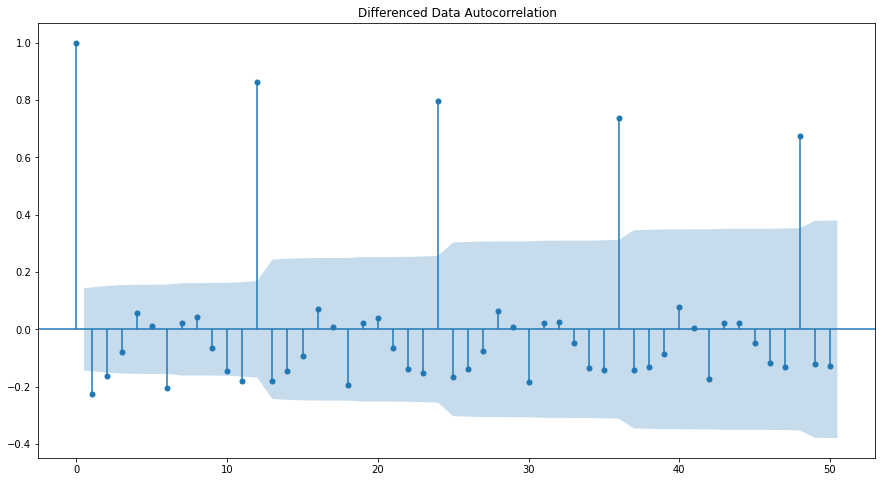

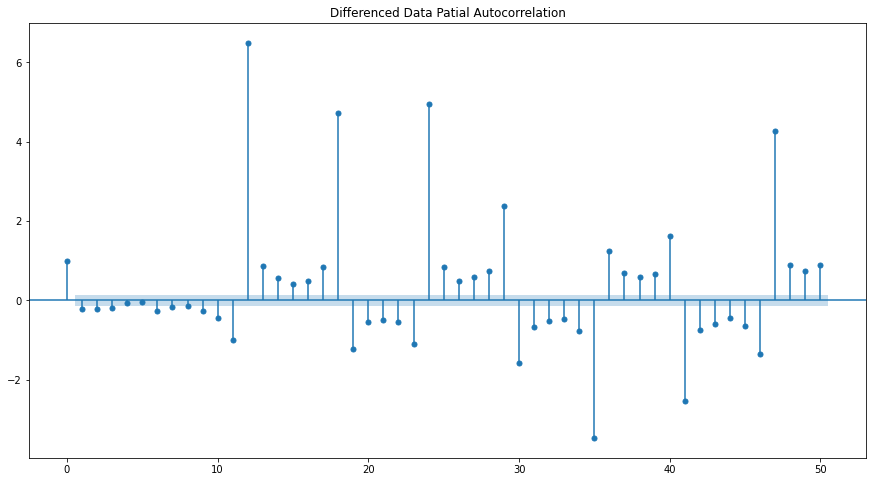

In [212]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [213]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3,1,2),
                                seasonal_order=(3,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -598.630
Date:                            Wed, 23 Feb 2022   AIC                           1219.260
Time:                                    20:26:33   BIC                           1245.462
Sample:                                         0   HQIC                          1229.765
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7556      0.151     -5.013      0.000      -1.051      -0.460
ar.L2          0.1168      0.185   

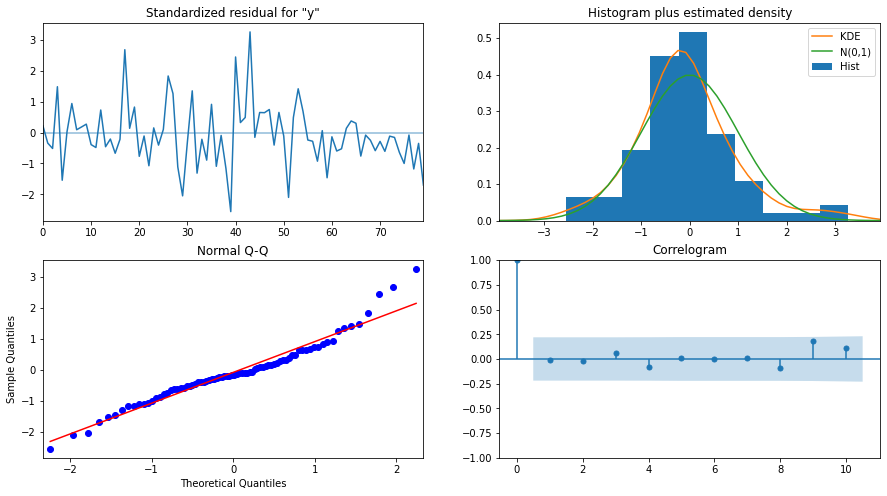

In [214]:
results_manual_SARIMA.plot_diagnostics();

In [215]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))
predicted_manual_SARIMA

array([1510.17287253, 1431.60278354, 1850.32666111, 1781.87702741,
       1550.35675267, 1468.87898289, 1830.90929979, 1657.63253846,
       2515.2920709 , 3396.81977848, 4412.61173754, 6447.34577551,
       1603.5780527 , 1460.50055459, 1883.62771021, 1801.6313975 ,
       1578.75253543, 1507.88897148, 1866.60170032, 1634.91955923,
       2443.68037715, 3477.53371347, 4451.04180947, 6334.47790651,
       1569.69201128, 1405.82698701, 1840.12048117, 1703.4406658 ,
       1554.2293118 , 1463.44503045, 1850.65940403, 1709.93071262,
       2437.90159629, 3416.60024091, 4353.47493065, 6320.43528163,
       1545.76781892, 1395.18871749, 1814.24515074, 1718.70303315,
       1532.90636712, 1459.19029123, 1820.7607931 , 1643.309989  ,
       2430.84121382, 3328.81141542, 4338.08486264, 6289.88716684,
       1530.29988507, 1415.62949033, 1822.24016358, 1748.64459236,
       1527.48702717, 1464.00015792, 1815.33096622])

In [216]:
predicted_manual_SARIMA_date = pd.DataFrame(predicted_manual_SARIMA, index=test.index, columns=test.columns)
predicted_manual_SARIMA_date

Sparkling
Time_Stamp             
1991-01-31  1510.172873
1991-02-28  1431.602784
1991-03-31  1850.326661
1991-04-30  1781.877027
1991-05-31  1550.356753
1991-06-30  1468.878983
1991-07-31  1830.909300
1991-08-31  1657.632538
1991-09-30  2515.292071
1991-10-31  3396.819778
1991-11-30  4412.611738
1991-12-31  6447.345776
1992-01-31  1603.578053
1992-02-29  1460.500555
1992-03-31  1883.627710
1992-04-30  1801.631398
1992-05-31  1578.752535
1992-06-30  1507.888971
1992-07-31  1866.601700
1992-08-31  1634.919559
1992-09-30  2443.680377
1992-10-31  3477.533713
1992-11-30  4451.041809
1992-12-31  6334.477907
1993-01-31  1569.692011
1993-02-28  1405.826987
1993-03-31  1840.120481
1993-04-30  1703.440666
1993-05-31  1554.229312
1993-06-30  1463.445030
1993-07-31  1850.659404
1993-08-31  1709.930713
1993-09-30  2437.901596
1993-10-31  3416.600241
1993-11-30  4353.474931
1993-12-31  6320.435282
1994-01-31  1545.767819
1994-02-28  1395.188717
1994-03-31  1814.245151
1994-04-30  1718.703033
1994-05-31  1532.906367
1994-06-30  1459.190291
1994-07-31  1820.760793
1994-08-31  1643.309989
1994-09-30  2430.841214
1994-10-31  3328.811415
1994-11-30  4338.084863
1994-12-31  6289.887167
1995-01-31  1530.299885
1995-02-28  1415.629490
1995-03-31  1822.240164
1995-04-30  1748.644592
1995-05-31  1527.487027
1995-06-30  1464.000158
1995-07-31  1815.330966

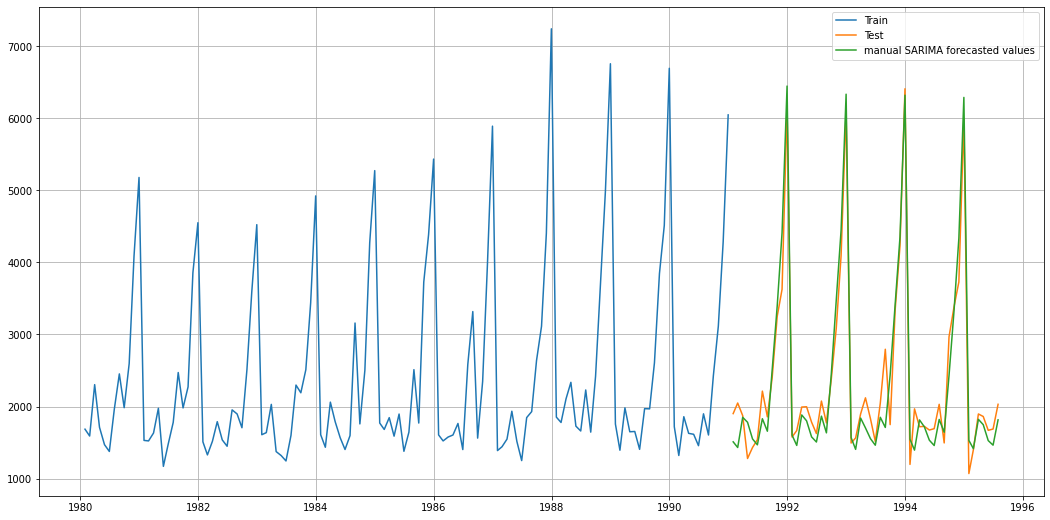

In [217]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_SARIMA_date, label='manual SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [218]:
from sklearn.metrics import mean_squared_error

In [219]:
RMSE_manual_SARIMA = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA,squared=False)
print('RMSE for the manual SARIMA model:',RMSE_manual_SARIMA)

RMSE for the manual SARIMA model: 329.55690868118654


In [220]:
results_df15 = pd.DataFrame({'Test RMSE': [RMSE_manual_SARIMA]}
                           ,index=['manual SARIMA(3,1,2)(3,1,2,12)'])

results_df = pd.concat([results_df, results_df15])
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
automated ARIMA(2,1,2)                               1299.979524
automatedSARIMA(1,1,2)(2,0,2,6)                       626.925693
automated SARIMA(1,1,2)*(1,0,2,12)                    528.389740
manual ARIMA(3,1,2)                                  1283.352842
manual SARIMA(3,1,2)(3,1,2,12)                        329.556909

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [221]:
results_df

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0,SimpleExponentialSmoothing                   1316.034674
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
automated ARIMA(2,1,2)                               1299.979524
automatedSARIMA(1,1,2)(2,0,2,6)                       626.925693
automated SARIMA(1,1,2)*(1,0,2,12)                    528.389740
manual ARIMA(3,1,2)                                  1283.352842
manual SARIMA(3,1,2)(3,1,2,12)                        329.556909

In [222]:
results_df.sort_values(by=['Test RMSE'], ascending=True)

Test RMSE
manual SARIMA(3,1,2)(3,1,2,12)                        329.556909
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.880831
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...    473.954384
automated SARIMA(1,1,2)*(1,0,2,12)                    528.389740
automatedSARIMA(1,1,2)(2,0,2,6)                       626.925693
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
SimpleAverageModel                                   1275.081804
RegressionOnTime                                     1275.867052
Alpha=0.01,SimpleExponentialSmoothing                1276.251337
manual ARIMA(3,1,2)                                  1283.352842
6pointTrailingMovingAverage                          1283.927428
automated ARIMA(2,1,2)                               1299.979524
Alpha=0,SimpleExponentialSmoothing                   1316.034674
9pointTrailingMovingAverage                          1346.278315
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     2007.238526
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

 we can see that the manual SARIMA model is giving the lowest RMSE on test data. So, we will go with manual SARIMA model.

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Optimum Model on Complete Dataset

In [223]:
final_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_final_model = final_model.fit(maxiter=1000)
print(results_final_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1000.243
Date:                            Wed, 23 Feb 2022   AIC                           2022.487
Time:                                    20:26:50   BIC                           2054.445
Sample:                                01-31-1980   HQIC                          2035.473
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8611      0.090     -9.546      0.000      -1.038      -0.684
ar.L2          0.0117      0.129   

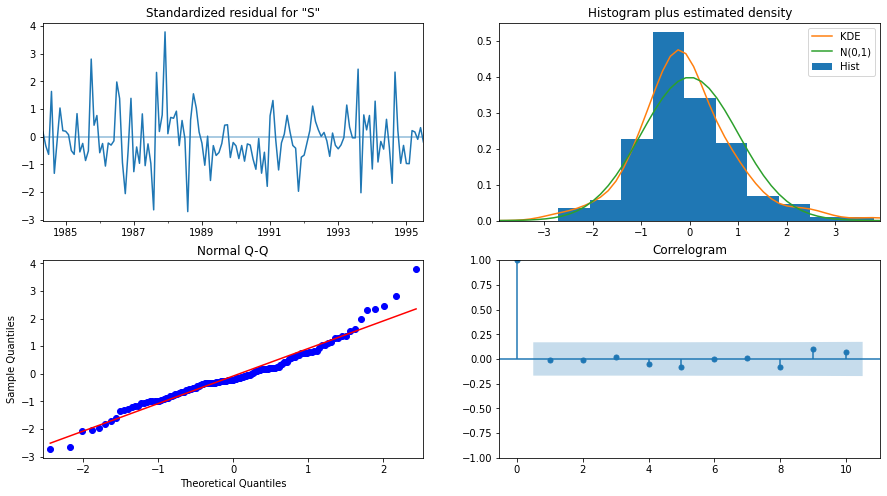

In [224]:
results_final_model.plot_diagnostics();

#### Forecasting 12 months into the future with the complete model

In [225]:
predicted_manual_SARIMA_final = results_final_model.get_forecast(steps=12)

In [226]:
predicted_manual_SARIMA_final.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1868.722447  396.502573    1091.591683    2645.853210
1995-09-30  2511.337191  401.850000    1723.725664    3298.948718
1995-10-31  3272.700171  402.696945    2483.428663    4061.971679
1995-11-30  3874.461237  403.111966    3084.376302    4664.546173
1995-12-31  6099.009090  403.131652    5308.885571    6889.132609

In [227]:
predicted_manual_SARIMA_final.summary_frame(alpha=0.05).tail()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1996-03-31  1872.458742  404.471778    1079.708625    2665.208859
1996-04-30  1851.465489  404.492868    1058.674035    2644.256942
1996-05-31  1719.880268  405.073050     925.951679    2513.808856
1996-06-30  1631.715759  405.103224     837.728030    2425.703488
1996-07-31  2038.441588  405.645169    1243.391665    2833.491510

In [228]:
rmse = mean_squared_error(df['Sparkling'],results_final_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 578.96457095304


In [229]:
pred_final_manual_SARIMA_date = predicted_manual_SARIMA_final.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [230]:
pred_final_manual_SARIMA_date

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1868.722447  396.502573    1091.591683    2645.853210
1995-09-30  2511.337191  401.850000    1723.725664    3298.948718
1995-10-31  3272.700171  402.696945    2483.428663    4061.971679
1995-11-30  3874.461237  403.111966    3084.376302    4664.546173
1995-12-31  6099.009090  403.131652    5308.885571    6889.132609
1996-01-31  1191.793876  403.840266     400.281498    1983.306253
1996-02-29  1557.080087  403.852106     765.544505    2348.615669
1996-03-31  1872.458742  404.471778    1079.708625    2665.208859
1996-04-30  1851.465489  404.492868    1058.674035    2644.256942
1996-05-31  1719.880268  405.073050     925.951679    2513.808856
1996-06-30  1631.715759  405.103224     837.728030    2425.703488
1996-07-31  2038.441588  405.645169    1243.391665    2833.491510

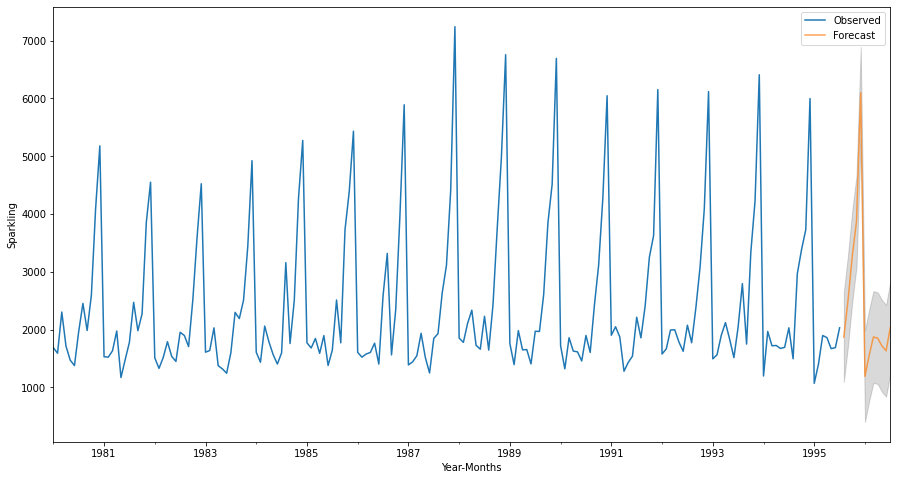

In [231]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_final_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_final_manual_SARIMA_date.index, pred_final_manual_SARIMA_date['mean_ci_lower'], 
                  pred_final_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

Any time series may be split into the following components:
Base Level + Trend + Seasonality + Error

Observations:

Sparkling sales shows stabilized values.

December month shows the highest sales.

The models are built and are chosen based on the least RMSE score.

The sales of Sparkling wine is seasonal and also had trend. Therefore, the company cannot have the same stock throughout the year.

The company should use prediction results to plan about future stock.

Inference:

The models are built considering the Trend and Seasonality in to account and we see from the output plot that the future prediction is in line with the trend and seasonality in the previous years.

The company should use the prediction results and capitalize on the high demand seasons and ensure to source and supply the high demand.

The company should use the prediction results to plan the low demand seasons to stock as per the demand. 
Products that are discounted should be highlighted so consumers can see the savings prominently Discounts can compel consumers to buy.

As we know how the seasonality is in the prediction company cannot have the same stock through the year. 

You should create a dynamic consumer experience with fresh point -of-sale materials and well stocked displays. Displays need to look fresh and interesting and tell a compelling story about why the consumer should purchase the product. 

Seasonal memberships and discounts can be introduced. Consumers get very excited about savings and appreciate discounts being passed on. Many prominent retailers also have loyalty programs or club member cards that create excitement. A club -member price brings consumers back and improve sales 

Events and tastings help draw consumers to your store and generate sales. 
Retailers with economies of scale successfully sample consumers on more profitable wines. 

Some even comparison -taste customers on national brands that are more expensive to demonstrate they are offering a less expensive but superior product. And bringing in celebrities, sommeliers or trade reps for tastings can help create excitement and drive traffic.
